# Dataset for Scientific Paper

### Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats
import plotly
import csv
import random
from scipy.stats import ks_2samp
import polars as pl

In [14]:
print("Polars version:", pl.__version__)

Polars version: 1.8.2


In [15]:
print("Numpy version:", np.__version__)

Numpy version: 1.26.4


### Dataset

In [17]:
pl.Config.set_tbl_rows(200)

polars.config.Config

In [18]:
import os
print(os.getcwd())

C:\Users\Samsung\Documents\DOTTORATO\GitHub\NSE_Lombardy


Firstly we upload the dataset.

In [23]:
full_data = pl.read_csv('C:/Users/Samsung/Documents/THESIS/Luca/dataset_utilizzabile.csv')

full_data.shape

(985788, 105)

#### Integration of TSH, Diagnosis and Category

In [20]:
tsh = pl.read_csv('TSH.csv')
tsh

shape: (985_783, 3)
┌────────────────────┬───────────────┬──────────────────┐
│ NTSH               ┆ SampleBarcode ┆ SamTimeCollected │
│ ---                ┆ ---           ┆ ---              │
│ str                ┆ str           ┆ str              │
╞════════════════════╪═══════════════╪══════════════════╡
│ 2,98073554390887   ┆ 20LD042587    ┆ 2021-12-21       │
│ 0,787225961633919  ┆ 20LD050321    ┆ 2021-12-28       │
│ 25,5033800140779   ┆ 20LD810743    ┆ 2021-12-20       │
│ 3,30434590191451   ┆ 20LD811192    ┆ 2021-12-17       │
│ 1,09726795806592   ┆ 20LD811194    ┆ 2021-12-16       │
│ 0,639845726824699  ┆ 20LD811195    ┆ 2021-12-16       │
│ 1,05596437725352   ┆ 20LD811196    ┆ 2021-12-17       │
│ 1,43407485552288   ┆ 20LD811197    ┆ 2021-12-17       │
│ 2,50485132033995   ┆ 20LD811198    ┆ 2021-12-17       │
│ 1,3838068718733    ┆ 20LD811199    ┆ 2021-12-17       │
│ 2,19064482858522   ┆ 20LD813080    ┆ 2021-12-12       │
│ 1,18971913494753   ┆ 21LD004707    ┆ 2021-12-19       │
│ 0,591931117662483  ┆ 21LD004751    ┆ 2021-12-29       │
│ 1,54509862503457   ┆ 21LD010563    ┆ 2021-12-27       │
│ 0,995177419745273  ┆ 21LD010920    ┆ 2021-12-28       │
│ 1,68088162961496   ┆ 21LD010946    ┆ 2021-12-23       │
│ 3,81185114619662   ┆ 21LD015502    ┆ 2021-12-16       │
│ 0,918377934799643  ┆ 21LD015503    ┆ 2021-12-25       │
│ 1,72323729231019   ┆ 21LD015505    ┆ 2021-12-23       │
│ 2,08343743887561   ┆ 21LD015508    ┆ 2021-12-19       │
│ 6,81               ┆ 21LD015516    ┆ 2021-12-19       │
│ 2,92139595636669   ┆ 21LD015517    ┆ 2021-12-25       │
│ 4,1813331275317    ┆ 21LD015519    ┆ 2021-12-26       │
│ 2,24457021580869   ┆ 21LD015526    ┆ 2021-12-22       │
│ 2,6767314024988    ┆ 21LD015527    ┆ 2021-12-25       │
│ 2,20035786668935   ┆ 21LD015528    ┆ 2021-12-21       │
│ 0,94342080115321   ┆ 21LD015529    ┆ 2021-12-20       │
│ 7,71               ┆ 21LD015530    ┆ 2021-12-21       │
│ 1,4922970572807    ┆ 21LD015532    ┆ 2021-12-24       │
│ 2,28344170441792   ┆ 21LD015533    ┆ 2021-12-26       │
│ 0,822343774607129  ┆ 21LD015534    ┆ 2021-12-25       │
│ 2,01623000116037   ┆ 21LD015536    ┆ 2021-12-26       │
│ 1,68719356099469   ┆ 21LD015562    ┆ 2021-12-15       │
│ 2,58955914579923   ┆ 21LD015572    ┆ 2021-12-21       │
│ 2,86303132949627   ┆ 21LD015578    ┆ 2021-12-19       │
│ 1,86728942299759   ┆ 21LD015584    ┆ 2021-12-23       │
│ 2,16201334600615   ┆ 21LD015586    ┆ 2021-12-16       │
│ 1,64737613561692   ┆ 21LD015588    ┆ 2021-12-15       │
│ 1,36493066942642   ┆ 21LD015589    ┆ 2021-12-16       │
│ 1,56061909711936   ┆ 21LD015591    ┆ 2021-12-15       │
│ 0,555935739652138  ┆ 21LD015592    ┆ 2021-12-17       │
│ 0,988115830438778  ┆ 21LD015594    ┆ 2021-12-18       │
│ 1,94073503020432   ┆ 21LD015595    ┆ 2021-12-18       │
│ 0,59370077513359   ┆ 21LD015596    ┆ 2021-12-17       │
│ 4,40844536272955   ┆ 21LD015597    ┆ 2021-12-18       │
│ 0,962959136920975  ┆ 21LD015600    ┆ 2021-12-19       │
│ 7,89               ┆ 21LD025326    ┆ 2021-12-24       │
│ 4,04874371450145   ┆ 21LD025327    ┆ 2021-12-24       │
│ 10,375014020889610 ┆ 21LD025328    ┆ 2021-12-23       │
│ 2,6579668316629    ┆ 21LD025329    ┆ 2021-12-22       │
│ 1,19707240533742   ┆ 21LD025330    ┆ 2021-12-22       │
│ 2,93487203979681   ┆ 21LD025331    ┆ 2021-12-26       │
│ 3,30758452143755   ┆ 21LD025333    ┆ 2021-12-26       │
│ 5,26215116191459   ┆ 21LD025335    ┆ 2021-12-22       │
│ 2,23005178543396   ┆ 21LD025336    ┆ 2021-12-21       │
│ 3,92144998836404   ┆ 21LD025337    ┆ 2021-12-21       │
│ 3,8347151970543    ┆ 21LD025338    ┆ 2021-12-19       │
│ 4,39721694433576   ┆ 21LD025340    ┆ 2021-12-18       │
│ 1,53979127979672   ┆ 21LD025341    ┆ 2021-12-16       │
│ 2,1045557903677    ┆ 21LD025343    ┆ 2021-12-23       │
│ 1,37023804787037   ┆ 21LD025347    ┆ 2021-12-21       │
│ 2,22393780584939   ┆ 21LD028571    ┆ 2021-12-18       │
│ 3,63817873763499   ┆ 21LD028575    ┆ 2021-12-23       │
│ 2,94847600617801   ┆ 21LD028576   

In [21]:
tsh['SampleBarcode'].unique().shape

(985783,)

In [22]:
tsh.shape

(985783, 3)

In [26]:
full_data = full_data.join(tsh, on= ["SampleBarcode"], how="left")
full_data.shape

(985788, 107)

In [27]:
full_data.columns

['ASATotal',
 'Ala',
 'Allele 1',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'BTD',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C22',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C20:0-LPC',
 'C22:0-LPC',
 'C24:0-LPC',
 'C26:0-LPC',
 'IRT-GSP',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '2OH GA',
 '3OH GA',
 '3OH PA',
 'MCA',
 'OROTICO',
 'PIVA',
 '2MBC',
 'c4-b',
 'c4-i',
 'DateOfBirth',
 'Sex',
 'City',
 'Sampling',
 'GestationalAge',
 'Etnicity',
 'SampleBarcode',
 'SampleQuality',
 'SamTimeCollected',
 'SamTimeReceived',
 'Weight',
 'AntibioticsBaby',
 'AntibioticsMother',
 'Meconium',
 'CortisoneBaby',
 'CortisoneMother',
 'TyroidMother',
 'Premature',
 'TooYo

In [28]:
full_data = full_data.drop('SamTimeCollected_right')

We sorted all the observations from the variable indicating the time of withdrawal.

In [30]:
full_data = full_data.sort('SamTimeCollected')

Then we uploaded the file with the diagnosis and rename the variable to be used for the join with the same name of the one in the main dataset.

In [32]:
dis = pl.read_excel('C:/Users/Samsung/Documents/THESIS/Per Gloria.xlsx')
dis = dis.rename({"CODIE NEONATO": "SampleBarcode"})
dis.head()

shape: (5, 3)
┌───────────────┬──────────┬───────────┐
│ SampleBarcode ┆ DIAGNOSI ┆ CATEGORIA │
│ ---           ┆ ---      ┆ ---       │
│ str           ┆ str      ┆ str       │
╞═══════════════╪══════════╪═══════════╡
│ 1600072855    ┆ MTHFR    ┆ AA        │
│ 1600096585    ┆ CBS      ┆ AA        │
│ 19LD032896    ┆ CBS      ┆ AA        │
│ 19LD011001    ┆ CBS      ┆ AA        │
│ 1500121493    ┆ PHE      ┆ AA        │
└───────────────┴──────────┴───────────┘

In [33]:
dis['SampleBarcode']

shape: (209,)
Series: 'SampleBarcode' [str]
[
	"1600072855"
	"1600096585"
	"19LD032896"
	"19LD011001"
	"1500121493"
	"1500186270"
	"1500123770"
	"1620230426"
	"1620399031"
	"1620352265"
	"1600109162"
	"1600285996"
	"1600209466"
	"1600512726"
	"1600914230"
	"1600292888"
	"1600992627"
	"1600600775"
	"1600355712"
	"1600153257"
	"1601000017"
	"1600572584"
	"1600137967"
	"1600739284"
	"1600739291"
	"1600556867"
	"1600495548"
	"1600871991"
	"1600407626"
	"1600789586"
	"1600670044"
	"1600928541"
	"0170023151"
	"1600930278"
	"1600985353"
	"0170107103"
	"0170143187"
	"0170137674"
	"1700295673"
	"1700170352"
	"1700733663"
	"1700131872"
	"1700130608"
	"1700708173"
	"1700562164"
	"1700958585"
	"18L0021429"
	"18L0012423"
	"18L0005533"
	"18L0016249"
	"18L0014462"
	"18L2003612"
	"18LD004809"
	"18LD007116"
	"18LD007985"
	"18LD011301"
	"18LD013957"
	"18LD024642"
	"18LD015198"
	"18LD028885"
	"18LD027102"
	"18LD038565"
	"18LD030642"
	"18LD028897"
	"18LD030751"
	"18LD070208"
	"18LD066806"
	"18LD040554"
	"18LD077278"
	"18LD055381"
	"18LD056662"
	"18LD053789"
	"19LD055355"
	"19LD012922"
	"19LD012228"
	"19LD003327"
	"19LD061283"
	"19LD001151"
	"19LD044122"
	"19LD052511"
	"19LD034280"
	"19LD041064"
	"19LD060025"
	"11LD004479"
	"11LD005096"
	"19LD119357"
	"19LD099458"
	"19LD017796"
	"19LD003399"
	"19LD103538"
	"19LD089434"
	"19LD115476"
	"19LD091211"
	"19LD094713"
	"19LD074514"
	"19LD075230"
	"19LD081424"
	"19LD108489"
	"19LD111310"
	"19LD097482"
	…
	"20LD046259"
	"19LD099927"
	"18LD042548"
	"18LD003024"
	"18LD013998"
	"18LD022938"
	"1600257597"
	"20LD052180"
	"19LD016610"
	"19LD093098"
	"19LD019595"
	"20LD007827"
	"1600249912"
	"18LD020180"
	"19LD042599"
	"20LD053513"
	"20LD808240"
	"20LD808837"
	"1600782778"
	"1600457867"
	"1700932950"
	"18LD075200"
	"18LD070395"
	"18LD081507"
	"19LD022941"
	"19LD043716"
	"1601064651"
	"18LD045190"
	"1700335959"
	"1600489141"
	"1600489202"
	"1600309425"
	"1700193054"
	"19LD023096"
	"1600604346"
	"1600933323"
	"1600824836"
	"18LD041767"
	"18LD038704"
	"1620038237"
	"1600201033"
	"18LD013819"
	"18LD023684"
	"11LD009353"
	" 19LD097729 "
	"19LD102817"
	"19LD094370"
	"1600121676"
	"1620032860"
	"1600512672"
	"0170064659"
	"0170041650"
	"0170132082"
	"18L0014055"
	"19LD039651"
	"19LD008248"
	"19LD050875"
	"11LD009055"
	"19LD114070"
	"20LD007026"
	"20LD009386"
	"20LD029468"
	"20LD806290"
	"20LD808772"
	"1600886346"
	"11LD006628"
	"20LD814140"
	"0170150093"
	"1700850483"
	"1700768610"
	"19LD036855"
	"1600196131"
	"1600710962"
	"0170076614"
	"1700448710"
	"1700157049"
	"1700741354"
	"1700478274"
	"1700602471"
	"1700795722"
	"1700947893"
	"18LD006659"
	"18LD009037"
	"18LD059545"
	"19LD031147"
	"19LD080919"
	"19LD079573"
	"20LD009632"
	"20LD049794"
	"1600626140"
	"20LD045334"
	"1600748637"
	"1600970724"
	"1700596213"
	"18LD017008"
	"19LD048472"
	"19LD029105"
	"20LD024836"
	"20LD024837"
	"18LD045080"
]

In [34]:
dis['DIAGNOSI'].unique()

shape: (30,)
Series: 'DIAGNOSI' [str]
[
	"ASA"
	"CIT1"
	"CblD"
	"CblA"
	"CBS"
	"PKU"
	"HPA"
	"VLCAD"
	"CPT2"
	"3MCC"
	"BKT"
	"CblC"
	"IBG"
	"CIT 1"
	"TYR3"
	"SCAD"
	"CPS1"
	"MMA"
	"ARG1"
	"CUD"
	"PHE"
	"TFP EXITUS"
	"MCAD"
	"2MBG"
	"GA1"
	"ARG"
	"IVA"
	"GA2"
	"MTHFR"
	"PA"
]

CIT 1 and CIT1 represent the same disease. The number of unique diseases appearing in the dataset is 29. \
The features with low consistency and low quality are deleted.

In [36]:
dis = dis.with_columns([pl.col("DIAGNOSI").str.replace(r"CIT 1", "CIT1").alias("DIAGNOSI")])

In [38]:
dis['CATEGORIA'].value_counts()

shape: (5, 2)
┌───────────┬───────┐
│ CATEGORIA ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ FAO       ┆ 35    │
│ SC        ┆ 26    │
│ UCD       ┆ 12    │
│ AO        ┆ 26    │
│ AA        ┆ 110   │
└───────────┴───────┘

'SC' is not a category. It is necessary to imput the right category for each observation with 'SC' as category.

In [40]:
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "IBG").then(pl.col("CATEGORIA").str.replace(r"SC", "AO")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])


In [41]:
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "TYR3").then(pl.col("CATEGORIA").str.replace(r"SC", "AA")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "SCAD").then(pl.col("CATEGORIA").str.replace(r"SC", "FAO")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "CPS1").then(pl.col("CATEGORIA").str.replace(r"SC", "AA")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])
dis = dis.with_columns([pl.when(pl.col("DIAGNOSI") == "3MCC").then(pl.col("CATEGORIA").str.replace(r"SC", "AO")).otherwise(pl.col("CATEGORIA")).alias("CATEGORIA")])


In [42]:
dis['CATEGORIA'].value_counts()

shape: (4, 2)
┌───────────┬───────┐
│ CATEGORIA ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ AO        ┆ 33    │
│ AA        ┆ 112   │
│ UCD       ┆ 12    │
│ FAO       ┆ 52    │
└───────────┴───────┘

In [43]:
dis = dis.rename({"DIAGNOSI": "Diagnosis"})
dis = dis.rename({"CATEGORIA": "Category"})

In [46]:
babies_d = full_data.join(dis, on="SampleBarcode", how="left")
babies_d

shape: (985_788, 102)
┌──────────┬─────────┬─────────┬────────┬───┬───────────────┬───────────────┬───────────┬──────────┐
│ ASATotal ┆ Ala     ┆ Arg     ┆ Cit    ┆ … ┆ id            ┆ NTSH          ┆ Diagnosis ┆ Category │
│ ---      ┆ ---     ┆ ---     ┆ ---    ┆   ┆ ---           ┆ ---           ┆ ---       ┆ ---      │
│ f64      ┆ f64     ┆ f64     ┆ f64    ┆   ┆ i64           ┆ str           ┆ str       ┆ str      │
╞══════════╪═════════╪═════════╪════════╪═══╪═══════════════╪═══════════════╪═══════════╪══════════╡
│ null     ┆ 230.42  ┆ 12.66   ┆ 13.8   ┆ … ┆ 7986692168495 ┆ 1,18036056423 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 25467         ┆ 254           ┆           ┆          │
│ null     ┆ 228.77  ┆ 11.44   ┆ 7.49   ┆ … ┆ -304531568350 ┆ 1,52760940507 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 6551317       ┆ 699           ┆           ┆          │
│ null     ┆ 248.25  ┆ 10.12   ┆ 13.88  ┆ … ┆ 5655596528266 ┆ 1,22157734314 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 926376        ┆ 711           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 8999108248963 ┆ 1,95616855699 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 732586        ┆ 912           ┆           ┆          │
│ null     ┆ 254.93  ┆ 2.25    ┆ 12.82  ┆ … ┆ -206274251919 ┆ 1,40038720690 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 8422210       ┆ 411           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 3467001463626 ┆ 1,84873889515 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 499211        ┆ 083           ┆           ┆          │
│ null     ┆ 204.82  ┆ 4.27    ┆ 17.81  ┆ … ┆ 5404533278905 ┆ 2,95218988828 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 550421        ┆ 211           ┆           ┆          │
│ null     ┆ 357.81  ┆ 3.92    ┆ 9.23   ┆ … ┆ -710884919279 ┆ 2,92432082047 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 1561097       ┆ 335           ┆           ┆          │
│ null     ┆ 279.2   ┆ 3.14    ┆ 16.42  ┆ … ┆ -800739940164 ┆ 4,54983950068 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 2400209       ┆ 617           ┆           ┆          │
│ null     ┆ 334.23  ┆ 2.55    ┆ 12.12  ┆ … ┆ 8291753707470 ┆ 2,19551688808 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 943964        ┆ 661           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 4828165840669 ┆ 1,17536324167 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 196153        ┆ 388           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 6524671024842 ┆ 1,58530598586 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 925972        ┆ 621           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 7290003871902 ┆ 2,58194494361 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 494665        ┆ 186           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 8334662152239 ┆ 4,23332699861 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 453935        ┆ 621           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ 2701559838426 ┆ 5,95018740178 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 245718        ┆ 489           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ -897368009447 ┆ 2,43620489544 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 3528699       ┆ 855           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0    ┆ … ┆ -638963153669 ┆ 2,46271992861 ┆ null      ┆ null     │
│          ┆         ┆         ┆        ┆   ┆ 6753457       ┆ 543           ┆           ┆          │
│ null     ┆ 0.0     ┆ 0.0     ┆ 0.0   

We then performed a join to merge the data.

The babies with a positive diagnosis are: 

In [48]:
babies_d.filter(pl.col('Diagnosis') != 'SANO')

shape: (198, 102)
┌──────────┬────────────┬──────────┬─────────┬───┬────────────┬────────────┬────────────┬──────────┐
│ ASATotal ┆ Ala        ┆ Arg      ┆ Cit     ┆ … ┆ id         ┆ NTSH       ┆ Diagnosis  ┆ Category │
│ ---      ┆ ---        ┆ ---      ┆ ---     ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---      │
│ f64      ┆ f64        ┆ f64      ┆ f64     ┆   ┆ i64        ┆ str        ┆ str        ┆ str      │
╞══════════╪════════════╪══════════╪═════════╪═══╪════════════╪════════════╪════════════╪══════════╡
│ null     ┆ 179.59     ┆ 7.44     ┆ 13.41   ┆ … ┆ -409987654 ┆ 3,25825825 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 5650839355 ┆ 50382      ┆            ┆          │
│ null     ┆ 461.74     ┆ 10.04    ┆ 15.39   ┆ … ┆ -132569622 ┆ 7,59       ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 806364478  ┆            ┆            ┆          │
│ null     ┆ 133.96     ┆ 3.92     ┆ 11.07   ┆ … ┆ -631335148 ┆ 1,19980240 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 8770467286 ┆ 696504     ┆            ┆          │
│ null     ┆ 208.07     ┆ 4.67     ┆ 13.54   ┆ … ┆ 2740625558 ┆ 2,50395897 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 724801853  ┆ 664433     ┆            ┆          │
│ null     ┆ 237.28     ┆ 14.34    ┆ 21.84   ┆ … ┆ 6137216806 ┆ 2,99116003 ┆ VLCAD      ┆ FAO      │
│          ┆            ┆          ┆         ┆   ┆ 024541851  ┆ 567312     ┆            ┆          │
│ null     ┆ 239.43     ┆ 15.58    ┆ 19.39   ┆ … ┆ -586617461 ┆ 2,67478103 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 2931821952 ┆ 227476     ┆            ┆          │
│ null     ┆ 309.91     ┆ 17.11    ┆ 12.11   ┆ … ┆ 4176424179 ┆ 0,87067416 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 051537154  ┆ 0740137    ┆            ┆          │
│ null     ┆ 533.14     ┆ 37.82    ┆ 31.28   ┆ … ┆ 4959290973 ┆ 2,31382157 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 29581375   ┆ 789875     ┆            ┆          │
│ null     ┆ 305.55     ┆ 5.71     ┆ 15.14   ┆ … ┆ -462289679 ┆ 3,06861656 ┆ MCAD       ┆ FAO      │
│          ┆            ┆          ┆         ┆   ┆ 6141812560 ┆ 036989     ┆            ┆          │
│ null     ┆ 182.15     ┆ 3.87     ┆ 6.69    ┆ … ┆ 7169164470 ┆ 2,11410053 ┆ CBS        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 964621447  ┆ 671648     ┆            ┆          │
│ null     ┆ 287.12     ┆ 8.48     ┆ 7.06    ┆ … ┆ 2216648088 ┆ 5,91       ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 971171389  ┆            ┆            ┆          │
│ null     ┆ 193.97     ┆ 1.86     ┆ 8.89    ┆ … ┆ 3810295304 ┆ 1,14168295 ┆ GA1        ┆ AO       │
│          ┆            ┆          ┆         ┆   ┆ 384576457  ┆ 777835     ┆            ┆          │
│ null     ┆ 193.85     ┆ 12.92    ┆ 22.5    ┆ … ┆ -900879053 ┆ 2,83009411 ┆ MTHFR      ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 2666449960 ┆ 813388     ┆            ┆          │
│ null     ┆ 371.72     ┆ 2.43     ┆ 11.81   ┆ … ┆ -484696138 ┆ 3,50945621 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 3063183456 ┆ 246921     ┆            ┆          │
│ null     ┆ 219.57     ┆ 10.95    ┆ 12.74   ┆ … ┆ -241105835 ┆ 4,34132320 ┆ MCAD       ┆ FAO      │
│          ┆            ┆          ┆         ┆   ┆ 571922537  ┆ 442962     ┆            ┆          │
│ null     ┆ 184.91     ┆ 7.38     ┆ 12.81   ┆ … ┆ 3221907322 ┆ 1,46261379 ┆ IVA        ┆ AO       │
│          ┆            ┆          ┆         ┆   ┆ 108247528  ┆ 357438     ┆            ┆          │
│ null     ┆ 195.225    ┆ 3.625    ┆ 5.22    ┆ … ┆ -244710383 ┆ 2,07709713 ┆ PHE        ┆ AA       │
│          ┆            ┆          ┆         ┆   ┆ 3573630399 ┆ 020083     ┆            ┆          │
│ null     ┆ 258.91     ┆ 14.72    ┆ 9.71  

We filled the missing values of the DIAGNOSI with the value 'SANO' which means healthy.

In [50]:
babies_d = babies_d.with_columns(replaced=pl.col("Diagnosis").replace(None, 'HEALTHY'))
babies_d = babies_d.drop('Diagnosis')
babies_d = babies_d.rename({"replaced": "Diagnosis"})
babies_d.group_by('Diagnosis').len()

shape: (30, 2)
┌────────────┬────────┐
│ Diagnosis  ┆ len    │
│ ---        ┆ ---    │
│ str        ┆ u32    │
╞════════════╪════════╡
│ TFP EXITUS ┆ 3      │
│ ASA        ┆ 1      │
│ CblA       ┆ 1      │
│ CIT1       ┆ 9      │
│ HEALTHY    ┆ 985590 │
│ BKT        ┆ 1      │
│ ARG        ┆ 1      │
│ IBG        ┆ 3      │
│ IVA        ┆ 3      │
│ TYR3       ┆ 1      │
│ PA         ┆ 2      │
│ MMA        ┆ 2      │
│ MTHFR      ┆ 1      │
│ VLCAD      ┆ 7      │
│ CUD        ┆ 3      │
│ GA1        ┆ 3      │
│ PHE        ┆ 16     │
│ CblD       ┆ 1      │
│ CPS1       ┆ 1      │
│ PKU        ┆ 29     │
│ ARG1       ┆ 1      │
│ HPA        ┆ 56     │
│ MCAD       ┆ 12     │
│ 3MCC       ┆ 3      │
│ SCAD       ┆ 16     │
│ CPT2       ┆ 1      │
│ 2MBG       ┆ 2      │
│ CblC       ┆ 11     │
│ CBS        ┆ 3      │
│ GA2        ┆ 5      │
└────────────┴────────┘

#### Deleting the features that are no usefull 

In [37]:
full_data = full_data.drop(['Allele 1','City', 'Etnicity', 'Sampling', 'AnswerIX', 'SampleQuality' ])

In [45]:
full_data.shape

(985788, 100)

In [340]:
babies_d.columns

['ASATotal',
 'Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'BTD',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C22',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C20:0-LPC',
 'C22:0-LPC',
 'C24:0-LPC',
 'C26:0-LPC',
 'IRT-GSP',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '2OH GA',
 '3OH GA',
 '3OH PA',
 'MCA',
 'OROTICO',
 'PIVA',
 '2MBC',
 'c4-b',
 'c4-i',
 'DateOfBirth',
 'Sex',
 'GestationalAge',
 'SampleBarcode',
 'SamDateCollected',
 'SamDateReceived',
 'Weight',
 'AntibioticsBaby',
 'AntibioticsMother',
 'Meconium',
 'CortisoneBaby',
 'CortisoneMother',
 'TyroidMother',
 'Premature',
 'TooYoung',
 'BabyFed',
 'HUFeed',
 'MIXFeed',
 'ARTFeed',
 'TPNFeed',
 

#### Fixing the types

In [53]:
babies_d = babies_d.with_columns(
    pl.col("NTSH")
    .cast(pl.Utf8)
    .str.replace_all(",", ".")  
    .cast(pl.Float64)
)


In [54]:
for col in babies_d.columns:
    print('colonna',col,'di tipo', babies_d[col].dtype)

colonna ASATotal di tipo Float64
colonna Ala di tipo Float64
colonna Arg di tipo Float64
colonna Cit di tipo Float64
colonna Glu di tipo Float64
colonna Gly di tipo Float64
colonna Leu\Ile\Pro-OH di tipo Float64
colonna Orn di tipo Float64
colonna MET di tipo Float64
colonna PHE di tipo Float64
colonna TYR di tipo Float64
colonna HCYS di tipo Float64
colonna Pro di tipo Float64
colonna Val di tipo Float64
colonna BTD di tipo Float64
colonna C0 di tipo Float64
colonna C3 di tipo Float64
colonna C4OH\C3DC di tipo Float64
colonna C4 di tipo Float64
colonna C5OH\C4DC di tipo Float64
colonna C5 di tipo Float64
colonna C5:1 di tipo Float64
colonna C5DC\C6OH di tipo Float64
colonna C6 di tipo Float64
colonna C6DC di tipo Float64
colonna C8 di tipo Float64
colonna C8:1 di tipo Float64
colonna C10 di tipo Float64
colonna C10:1 di tipo Float64
colonna C10:2 di tipo Float64
colonna C12 di tipo Float64
colonna C12:1 di tipo Float64
colonna C14 di tipo Float64
colonna C14:1 di tipo Float64
colonna 

In [55]:
babies_d = babies_d.with_columns(pl.col("Weight").cast(pl.Float64))
babies_d = babies_d.with_columns(pl.col('IRT-GSP').cast(pl.Float64))

In [56]:
babies_d = babies_d.with_columns(babies_d["CortisoneMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["AntibioticsMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["Meconium"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["TyroidMother"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["BIS"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["BabyFed"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["Twins"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["CortisoneBaby"].fill_null("0"))
babies_d = babies_d.with_columns(babies_d["AntibioticsBaby"].fill_null("0"))

In [57]:
babies_d = babies_d.with_columns([pl.col("CortisoneMother").cast(pl.Float64).cast(pl.Int8),
    pl.col("AntibioticsMother").cast(pl.Float64).cast(pl.Int8),
    pl.col("Meconium").cast(pl.Float64).cast(pl.Int8),
    pl.col("TyroidMother").cast(pl.Float64).cast(pl.Int8), 
    pl.col("BIS").cast(pl.Float64).cast(pl.Int8), 
    pl.col("BabyFed").cast(pl.Float64).cast(pl.Int8),
    pl.col("Twins").cast(pl.Float64).cast(pl.Int8),
    pl.col("CortisoneBaby").cast(pl.Float64).cast(pl.Int8),
    pl.col("AntibioticsBaby").cast(pl.Float64).cast(pl.Int8),
    pl.col("MIXFeed").cast(pl.Float64).cast(pl.Int8),
    pl.col("ARTFeed").cast(pl.Float64).cast(pl.Int8),
    pl.col("TPNFeed").cast(pl.Float64).cast(pl.Int8),
    pl.col("ENFeed").cast(pl.Float64).cast(pl.Int8), 
    pl.col("TPNCARNFeed").cast(pl.Float64).cast(pl.Int8),
    pl.col("TPNMCTFeed").cast(pl.Float64).cast(pl.Int8)
])

In [58]:
babies_d = babies_d.with_columns(pl.col("DateOfBirth").str.to_date("%Y-%m-%d"))
babies_d = babies_d.with_columns(pl.col("SamTimeCollected").str.replace("T00:00:00.000000", "").alias("SamTimeCollected"))
babies_d = babies_d.with_columns(pl.col("SamTimeCollected").str.to_date("%Y-%m-%d"))

In [59]:
babies_d = babies_d.rename({"SamTimeCollected": "SamDateCollected"})

In [60]:
babies_d['SamTimeReceived'].unique()

shape: (12_224,)
Series: 'SamTimeReceived' [str]
[
	"2021-07-09 14:44:00.893"
	"2018-09-07 14:38:38.350"
	"2021-05-03 15:30:41.700"
	"2018-07-06 11:54:00.493"
	"2019-11-11 12:29:30.600"
	"2020-12-16 12:04:35.547"
	"2018-11-13 14:40:51.670"
	"2018-07-27 11:40:51.387"
	"2012-12-17"
	"2019-08-30 11:59:53.967"
	"2014-11-24"
	"2019-03-22 10:46:39.073"
	"2021-07-05 10:56:05.530"
	"2019-05-14 15:22:35.467"
	"2019-06-24 15:04:50.907"
	"2018-08-03 12:55:14.140"
	"2018-03-05 14:49:55.200"
	"2019-04-12 12:01:26.373"
	"2018-10-29 14:10:52.000"
	"2018-05-02 10:57:40.400"
	"2017-10-16 14:29:02.907"
	"2020-04-08 15:03:15.980"
	"2015-12-01 00:00:00.000"
	"2018-10-15 15:56:30.467"
	"2020-07-21 14:40:09.130"
	"2017-03-20 10:18:20.037"
	"2019-07-29 13:08:20.910"
	"2019-12-16 14:40:21.900"
	"2019-09-02 12:24:59.767"
	"2020-02-10 14:55:09.927"
	"2019-06-19 12:27:20.723"
	"2018-08-03 11:35:03.617"
	"2020-01-20 11:55:24.087"
	"2019-06-19 12:34:20.843"
	"2018-12-20 12:23:29.350"
	"2017-10-04 15:07:06.523"
	"2017-05-02 15:39:32.040"
	"2018-03-26 10:49:06.650"
	"2017-04-13 12:09:49.780"
	"2017-01-26 13:58:17.190"
	"2019-03-18 13:28:28.940"
	"2020-07-09 10:10:46.447"
	"2020-05-25 15:03:04.767"
	"2021-01-04 11:25:11.477"
	"2017-03-27 14:40:20.690"
	"2019-05-08 13:13:13.957"
	"2020-02-17 13:45:27.037"
	"2019-01-07 11:54:13.157"
	"2021-07-06 12:37:49.200"
	"2020-02-26 12:42:23.300"
	"2020-07-22 12:02:56.167"
	"2019-06-14 15:41:09.697"
	"2018-11-26 12:13:07.027"
	"2017-04-04 11:17:40.640"
	"2019-03-26 13:32:37.950"
	"2018-08-02 10:16:06.773"
	"2020-02-27 14:31:41.537"
	"2018-08-06 14:24:55.397"
	"2021-08-02 10:46:59.600"
	"2019-09-25 12:49:36.583"
	"2020-01-17 12:33:02.497"
	"2020-11-17 14:52:22.623"
	"2020-05-18 11:49:01.580"
	"2021-07-29 14:45:58.650"
	"2018-01-15 12:26:07.140"
	"2017-09-18 11:59:25.787"
	"2017-04-10 14:22:50.373"
	"2021-12-28 12:30:02.003"
	"2017-07-10 15:22:24.183"
	"2021-10-27 11:31:47.437"
	"2017-02-14 12:04:22.707"
	"2018-11-05 16:04:33.053"
	"2021-12-10 12:34:15.243"
	"2019-09-27 12:17:26.457"
	"2012-11-28"
	"2012-11-22"
	"2018-11-14 15:30:45.910"
	"2015-11-23"
	"2018-07-25 13:20:02.340"
	"2020-01-20 15:22:04.993"
	"2015-10-19"
	"2021-12-01 11:13:24.587"
	"2012-05-23"
	"2021-12-06 14:23:37.220"
	"2021-05-25 14:55:21.190"
	"2018-10-12 13:26:33.113"
	"2019-02-01 13:40:51.030"
	"2018-04-10 11:44:13.140"
	"2016-05-20 00:00:00.000"
	"2020-03-26 14:41:07.950"
	"2018-02-09 11:36:15.307"
	"2020-02-18 13:16:12.483"
	"2021-07-06 12:09:27.163"
	"2016-04-18"
	"2019-02-08 12:46:30.700"
	"2019-02-07 13:06:13.587"
	"2018-12-20 15:55:43.927"
	"2019-10-02 12:12:19.897"
	"2019-09-16 15:11:48.413"
	"2020-06-29 11:09:25.587"
	…
	"2021-07-12 13:06:22.100"
	"2020-06-29 11:47:22.250"
	"2021-01-04 16:31:30.607"
	"2019-11-11 13:16:25.137"
	"2021-02-22 13:15:00.593"
	"2020-01-24 13:00:52.190"
	"2019-05-02 13:22:09.837"
	"2018-12-12 11:32:22.327"
	"2020-06-29 14:38:16.000"
	"2021-08-27 11:14:59.940"
	"2019-01-07 13:28:06.640"
	"2020-09-15 12:37:59.547"
	"2019-01-28 13:52:42.587"
	"2017-07-07 10:41:24.813"
	"2020-10-19 14:28:21.370"
	"2020-07-10 08:50:10.240"
	"2018-10-16 12:08:48.743"
	"2021-03-08 13:04:43.097"
	"2021-07-19 15:18:34.340"
	"2021-11-29 11:36:22.047"
	"2019-10-11 15:18:56.447"
	"2019-01-11 11:48:25.373"
	"2018-01-16 11:16:17.137"
	"2016-08-31"
	"2017-07-04 15:39:47.600"
	"2019-08-26 12:06:14.900"
	"2020-04-07 14:54:25.947"
	"2018-12-10 12:01:16.277"
	"2019-01-21 11:41:29.863"
	"2017-11-21 15:20:59.030"
	"2017-09-25 15:46:55.947"
	"2021-02-19 12:59:11.543"
	"2019-11-07 12:22:24.260"
	"2017-01-10 12:02:17.790"
	"2021-01-18 12:38:57.450"
	"2017-03-24 12:56:06.623"
	"2018-04-05 11:50:27.250"
	"2019-09-18 12:38:30.890"
	"2021-03-19 10:48:01.000"
	"2018-08-20 14:51:53.177"
	"2018-05-31 12:26:03.083"
	"2020-06-04 12:19:58.957"
	"2018-05-09 15:24:18.047"
	"2019-05-17 11:53:07.640"
	"2018-05-16 11:55:10.343"
	"2012-08-28"
	"2021-02-12 14:14:42.137"
	"2020-02-24 13:13:06.257"
	"2019-09-23 15:34:30.870"
	"2013-10-21"
	"2019-06-20 15:17:44.763"
	"2017-09-08

In [61]:
babies_d = babies_d.with_columns(
    pl.col("SamTimeReceived")
    .str.strptime(pl.Datetime, format= None, strict=True)
    .cast(pl.Date) 
)


In [62]:
babies_d = babies_d.rename({"SamTimeReceived": "SamDateReceived"})

In [86]:
babies_def = babies_def.with_columns(pl.col("ASATotal").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("Glu").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C18:2OH").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C20").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C20").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C22").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C24").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C26").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("ADO").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("D-ADO").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C20:0-LPC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C22:0-LPC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C24:0-LPC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("C26:0-LPC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("IRT-GSP").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("EMA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("2OH GA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("3OH GA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("3OH PA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("MCA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("OROTICO").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("PIVA").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("2MBC").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("c4-b").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("c4-i").cast(pl.Float64))
babies_def = babies_def.with_columns(pl.col("HCYS").cast(pl.Float64))

#### GestationalAge
- Are TooYoung all with less than 37 week of gestationalage?

In [64]:
babies_d = babies_d.with_columns(pl.when(pl.col('GestationalAge') < 37).then(1).otherwise(0).alias('Premature'))

In [65]:
babies_d.filter((pl.col('Premature') == 1) & (pl.col('GestationalAge') < 37))

shape: (122_485, 102)
┌──────────┬────────────┬─────────┬─────────┬───┬────────────────┬──────────┬──────────┬───────────┐
│ ASATotal ┆ Ala        ┆ Arg     ┆ Cit     ┆ … ┆ id             ┆ NTSH     ┆ Category ┆ Diagnosis │
│ ---      ┆ ---        ┆ ---     ┆ ---     ┆   ┆ ---            ┆ ---      ┆ ---      ┆ ---       │
│ f64      ┆ f64        ┆ f64     ┆ f64     ┆   ┆ i64            ┆ f64      ┆ str      ┆ str       │
╞══════════╪════════════╪═════════╪═════════╪═══╪════════════════╪══════════╪══════════╪═══════════╡
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 34670014636264 ┆ 1.848739 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 99211          ┆          ┆          ┆           │
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ 65246710248429 ┆ 1.585306 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 25972          ┆          ┆          ┆           │
│ null     ┆ 193.28     ┆ 15.95   ┆ 25.26   ┆ … ┆ -6224147610971 ┆ 3.152597 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 930503         ┆          ┆          ┆           │
│ null     ┆ 164.51     ┆ 9.14    ┆ 7.47    ┆ … ┆ -8087676631629 ┆ 2.221581 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 921686         ┆          ┆          ┆           │
│ null     ┆ 0.0        ┆ 0.0     ┆ 0.0     ┆ … ┆ -8027301619196 ┆ 2.38931  ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 848643         ┆          ┆          ┆           │
│ null     ┆ 480.64     ┆ 58.35   ┆ 23.81   ┆ … ┆ -7148762691522 ┆ 1.06767  ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 595745         ┆          ┆          ┆           │
│ null     ┆ 226.4      ┆ 44.95   ┆ 25.76   ┆ … ┆ 25947020194883 ┆ 0.76355  ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 81036          ┆          ┆          ┆           │
│ null     ┆ 224.83     ┆ 7.12    ┆ 9.6     ┆ … ┆ -5313653079522 ┆ 3.350174 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 53215          ┆          ┆          ┆           │
│ null     ┆ 655.09     ┆ 27.68   ┆ 9.57    ┆ … ┆ -3979712806580 ┆ 0.197604 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 280294         ┆          ┆          ┆           │
│ null     ┆ 193.46     ┆ 7.14    ┆ 10.55   ┆ … ┆ 14573002249572 ┆ 0.283857 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 48118          ┆          ┆          ┆           │
│ null     ┆ 314.25322  ┆ 26.93   ┆ 12.51   ┆ … ┆ 22984843655374 ┆ 0.688304 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 65913          ┆          ┆          ┆           │
│ null     ┆ 323.12     ┆ 13.91   ┆ 28.49   ┆ … ┆ -3977697317442 ┆ 0.434105 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 396414         ┆          ┆          ┆           │
│ null     ┆ 246.34     ┆ 17.72   ┆ 19.09   ┆ … ┆ -7954205922551 ┆ 1.214333 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 453565         ┆          ┆          ┆           │
│ null     ┆ 371.97     ┆ 14.93   ┆ 5.8     ┆ … ┆ -4263061784894 ┆ 2.26016  ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 784903         ┆          ┆          ┆           │
│ null     ┆ 279297.035 ┆ 59.07   ┆ 23.29   ┆ … ┆ -7446081674026 ┆ 1.29987  ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 18512          ┆          ┆          ┆           │
│ null     ┆ 252.74     ┆ 11.82   ┆ 10.47   ┆ … ┆ -2483121181206 ┆ 3.279912 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 695066         ┆          ┆          ┆           │
│ null     ┆ 257.06     ┆ 16.38   ┆ 14.36   ┆ … ┆ 75627782772927 ┆ 0.452659 ┆ null     ┆ HEALTHY   │
│          ┆            ┆         ┆         ┆   ┆ 20435          ┆          ┆          ┆           │
│ null     ┆ 124.4      ┆ 1.9     ┆ 6.6

In [66]:
babies_d.filter((pl.col('Premature') == 1) & (pl.col('GestationalAge') > 37))


shape: (0, 102)
┌──────────┬─────┬─────┬─────┬───┬─────┬──────┬──────────┬───────────┐
│ ASATotal ┆ Ala ┆ Arg ┆ Cit ┆ … ┆ id  ┆ NTSH ┆ Category ┆ Diagnosis │
│ ---      ┆ --- ┆ --- ┆ --- ┆   ┆ --- ┆ ---  ┆ ---      ┆ ---       │
│ f64      ┆ f64 ┆ f64 ┆ f64 ┆   ┆ i64 ┆ f64  ┆ str      ┆ str       │
╞══════════╪═════╪═════╪═════╪═══╪═════╪══════╪══════════╪═══════════╡
└──────────┴─────┴─────┴─────┴───┴─────┴──────┴──────────┴───────────┘

ok, this is correct

#### Numerical Features

In [69]:
colonne_numeriche = []
cat = ['AntibioticsBaby', 'Hospital','Meconium','CortisoneBaby','AntibioticsMother', 'CortisoneMother','TyroidMother','TPNMCTFeed', 'Premature','TooYoung', 'Sex', 'AnswerIX', 'HUFeed', 'MIXFeed','ARTFeed','TPNFeed','ENFeed','TPNCARNFeed','BIS','BabyFed', 'Twins','TPNMCTFeed']
ciclo = list(filter(lambda x: x not in cat, babies_d.columns))
for col in ciclo:
    if (babies_d[col].dtype == pl.Float64) | (babies_d[col].dtype == pl.Int64):
        colonne_numeriche.append(col)

In [70]:
print(f'numeric columns: {len(colonne_numeriche)}')
print(f'categorical columns: {len(cat)}')
print(f'date columns: 3')
print(f'total columns: {babies_d.shape[1]}')

numeric columns: 75
categorical columns: 22
date columns: 3
total columns: 102


#### ID isolation
Now retains for each id, only the first card that appears in the dataset.

In [72]:
malati = babies_d.filter(pl.col('Diagnosis') != 'HEALTHY')

In [73]:
malati.shape

(198, 102)

In [74]:
id_sick = malati['id']

In [75]:
id_sick.dtype

Int64

In [356]:
babies = babies_d.unique(subset="id", keep="first")
babies.shape

(791752, 102)

In [78]:
babies_filtered = babies.filter(~pl.col("id").is_in(id_sick))

In [352]:
babies_filtered.head()

shape: (5, 102)
┌──────────┬────────┬───────┬───────┬───┬──────────────────────┬──────────┬──────────┬───────────┐
│ ASATotal ┆ Ala    ┆ Arg   ┆ Cit   ┆ … ┆ id                   ┆ NTSH     ┆ Category ┆ Diagnosis │
│ ---      ┆ ---    ┆ ---   ┆ ---   ┆   ┆ ---                  ┆ ---      ┆ ---      ┆ ---       │
│ f64      ┆ f64    ┆ f64   ┆ f64   ┆   ┆ i64                  ┆ f64      ┆ str      ┆ str       │
╞══════════╪════════╪═══════╪═══════╪═══╪══════════════════════╪══════════╪══════════╪═══════════╡
│ null     ┆ 359.92 ┆ 21.55 ┆ 14.13 ┆ … ┆ 2390824725089548484  ┆ 2.560625 ┆ null     ┆ HEALTHY   │
│ null     ┆ 382.47 ┆ 6.5   ┆ 19.36 ┆ … ┆ 69626714559089548    ┆ 4.247822 ┆ null     ┆ HEALTHY   │
│ null     ┆ 332.69 ┆ 13.32 ┆ 13.56 ┆ … ┆ 3971626919242260283  ┆ 4.471512 ┆ null     ┆ HEALTHY   │
│ null     ┆ 207.19 ┆ 3.35  ┆ 10.2  ┆ … ┆ 3653463417735903912  ┆ 1.890041 ┆ null     ┆ HEALTHY   │
│ null     ┆ 139.17 ┆ 7.48  ┆ 7.86  ┆ … ┆ -7305757621162809998 ┆ 2.825449 ┆ null     ┆ HEALTHY   │
└──────────┴────────┴───────┴───────┴───┴──────────────────────┴──────────┴──────────┴───────────┘

In [80]:
babies_def = pl.concat([ babies_filtered, malati])

In [365]:
babies_def.null_count()

shape: (1, 103)
┌──────────┬─────┬─────┬─────┬───┬──────┬──────────┬───────────┬───────┐
│ ASATotal ┆ Ala ┆ Arg ┆ Cit ┆ … ┆ NTSH ┆ Category ┆ Diagnosis ┆ check │
│ ---      ┆ --- ┆ --- ┆ --- ┆   ┆ ---  ┆ ---      ┆ ---       ┆ ---   │
│ u32      ┆ u32 ┆ u32 ┆ u32 ┆   ┆ u32  ┆ u32      ┆ u32       ┆ u32   │
╞══════════╪═════╪═════╪═════╪═══╪══════╪══════════╪═══════════╪═══════╡
│ 740859   ┆ 422 ┆ 422 ┆ 422 ┆ … ┆ 270  ┆ 791554   ┆ 0         ┆ 1     │
└──────────┴─────┴─────┴─────┴───┴──────┴──────────┴───────────┴───────┘

In [81]:
babies_def.shape

(791752, 102)

In [82]:
babies_def['Diagnosis', 'Category'].unique()

shape: (30, 2)
┌────────────┬──────────┐
│ Diagnosis  ┆ Category │
│ ---        ┆ ---      │
│ str        ┆ str      │
╞════════════╪══════════╡
│ MTHFR      ┆ AA       │
│ CblC       ┆ AO       │
│ PA         ┆ AO       │
│ MCAD       ┆ FAO      │
│ GA2        ┆ FAO      │
│ SCAD       ┆ FAO      │
│ ARG        ┆ UCD      │
│ GA1        ┆ AO       │
│ CIT1       ┆ UCD      │
│ ASA        ┆ UCD      │
│ CUD        ┆ FAO      │
│ CBS        ┆ AA       │
│ PHE        ┆ AA       │
│ HEALTHY    ┆ null     │
│ ARG1       ┆ UCD      │
│ HPA        ┆ AA       │
│ CPS1       ┆ AA       │
│ CPT2       ┆ FAO      │
│ CblA       ┆ AO       │
│ IVA        ┆ AO       │
│ VLCAD      ┆ FAO      │
│ PKU        ┆ AA       │
│ TFP EXITUS ┆ FAO      │
│ MMA        ┆ AO       │
│ 3MCC       ┆ AO       │
│ 2MBG       ┆ AO       │
│ CblD       ┆ AO       │
│ IBG        ┆ AO       │
│ BKT        ┆ AO       │
│ TYR3       ┆ AA       │
└────────────┴──────────┘

### Technical Validation

**Type**

In [85]:
for c in babies_def.columns:
    print(f'La colonna {c} ha tipo {babies_def[c].dtype}')

La colonna ASATotal ha tipo Float64
La colonna Ala ha tipo Float64
La colonna Arg ha tipo Float64
La colonna Cit ha tipo Float64
La colonna Glu ha tipo Float64
La colonna Gly ha tipo Float64
La colonna Leu\Ile\Pro-OH ha tipo Float64
La colonna Orn ha tipo Float64
La colonna MET ha tipo Float64
La colonna PHE ha tipo Float64
La colonna TYR ha tipo Float64
La colonna HCYS ha tipo Float64
La colonna Pro ha tipo Float64
La colonna Val ha tipo Float64
La colonna BTD ha tipo Float64
La colonna C0 ha tipo Float64
La colonna C3 ha tipo Float64
La colonna C4OH\C3DC ha tipo Float64
La colonna C4 ha tipo Float64
La colonna C5OH\C4DC ha tipo Float64
La colonna C5 ha tipo Float64
La colonna C5:1 ha tipo Float64
La colonna C5DC\C6OH ha tipo Float64
La colonna C6 ha tipo Float64
La colonna C6DC ha tipo Float64
La colonna C8 ha tipo Float64
La colonna C8:1 ha tipo Float64
La colonna C10 ha tipo Float64
La colonna C10:1 ha tipo Float64
La colonna C10:2 ha tipo Float64
La colonna C12 ha tipo Float64
La 

**Premature**

In [88]:
babies_def.filter(pl.col('GestationalAge') <= 36)['Premature'].unique()

shape: (1,)
Series: 'Premature' [i32]
[
	1
]

In [89]:
babies_def.filter(pl.col('GestationalAge') > 36)['Premature'].unique()

shape: (1,)
Series: 'Premature' [i32]
[
	0
]

**DateOfCollection**

In [91]:
babies_def = babies_def.with_columns((pl.col('SamDateCollected') - pl.col('DateOfBirth')).alias('check'))

In [92]:
babies_def

shape: (791_752, 103)
┌──────────┬───────────┬──────────┬────────┬───┬──────────┬──────────┬───────────┬──────────────┐
│ ASATotal ┆ Ala       ┆ Arg      ┆ Cit    ┆ … ┆ NTSH     ┆ Category ┆ Diagnosis ┆ check        │
│ ---      ┆ ---       ┆ ---      ┆ ---    ┆   ┆ ---      ┆ ---      ┆ ---       ┆ ---          │
│ f64      ┆ f64       ┆ f64      ┆ f64    ┆   ┆ f64      ┆ str      ┆ str       ┆ duration[ms] │
╞══════════╪═══════════╪══════════╪════════╪═══╪══════════╪══════════╪═══════════╪══════════════╡
│ null     ┆ 359.92    ┆ 21.55    ┆ 14.13  ┆ … ┆ 2.560625 ┆ null     ┆ HEALTHY   ┆ 4d           │
│ null     ┆ 382.47    ┆ 6.5      ┆ 19.36  ┆ … ┆ 4.247822 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 332.69    ┆ 13.32    ┆ 13.56  ┆ … ┆ 4.471512 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 207.19    ┆ 3.35     ┆ 10.2   ┆ … ┆ 1.890041 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 139.17    ┆ 7.48     ┆ 7.86   ┆ … ┆ 2.825449 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ 0.365    ┆ 370.823   ┆ 2.9      ┆ 12.491 ┆ … ┆ 1.309875 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 179.42    ┆ 9.2      ┆ 13.01  ┆ … ┆ 2.755636 ┆ null     ┆ HEALTHY   ┆ 1d           │
│ null     ┆ 295.75    ┆ 48.59    ┆ 19.56  ┆ … ┆ 4.503264 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ 0.165    ┆ 476.678   ┆ 10.344   ┆ 12.239 ┆ … ┆ 1.450741 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 260.77    ┆ 9.52     ┆ 9.61   ┆ … ┆ 2.100712 ┆ null     ┆ HEALTHY   ┆ 3d           │
│ 0.271    ┆ 365.408   ┆ 11.669   ┆ 16.816 ┆ … ┆ 1.450477 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 172.78    ┆ 6.09     ┆ 8.27   ┆ … ┆ 1.194992 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ 0.21     ┆ 351.101   ┆ 6.582    ┆ 15.029 ┆ … ┆ 1.454041 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 276.83    ┆ 8.82     ┆ 20.43  ┆ … ┆ 1.447121 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 174.57    ┆ 5.32     ┆ 7.94   ┆ … ┆ 1.049081 ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 483.86    ┆ 30.26    ┆ 24.51  ┆ … ┆ 5.163715 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 322.02    ┆ 2.63     ┆ 9.99   ┆ … ┆ 1.122172 ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 355.24    ┆ 15.98    ┆ 14.52  ┆ … ┆ 2.47368  ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 293.28    ┆ 3.75     ┆ 15.74  ┆ … ┆ 3.654677 ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 173.57    ┆ 16.8     ┆ 18.22  ┆ … ┆ 1.407685 ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 306.61    ┆ 20.32    ┆ 12.46  ┆ … ┆ 2.22089  ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 254.28    ┆ 7.55     ┆ 9.8    ┆ … ┆ 1.051168 ┆ null     ┆ HEALTHY   ┆ 4d           │
│ null     ┆ 474.6     ┆ 17.42    ┆ 74.89  ┆ … ┆ 3.78779  ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 339.99    ┆ 19.52    ┆ 12.94  ┆ … ┆ 1.06782  ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 266.86    ┆ 7.86     ┆ 15.19  ┆ … ┆ 1.893414 ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 238.67    ┆ 5.46     ┆ 15.28  ┆ … ┆ 0.735073 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 241.54    ┆ 11.27    ┆ 15.83  ┆ … ┆ 2.951281 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 181.33    ┆ 3.32     ┆ 12.48  ┆ … ┆ 0.547326 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 375.24    ┆ 21.86    ┆ 33.85  ┆ … ┆ 3.588285 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 187.8     ┆ 12.59    ┆ 8.52   ┆ … ┆ 2.833446 ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 210.9     ┆ 3.25     ┆ 12.34  ┆ … ┆ 4.280507 ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 225.75    ┆ 9.71     ┆ 11.18  ┆ … ┆ 3.749824 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 265.47    ┆ 12.27    ┆ 10.35  ┆ … ┆ 5.698818 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 136.23    ┆ 2.3      ┆ 14.35  ┆ … ┆ 1.503292 ┆ null     ┆ HEALTHY   ┆ 2d           │
│ null     ┆ 139.43    ┆ 1.55     ┆ 5.91   ┆ … ┆ 1.071542 ┆ null     ┆ HEALTHY   ┆ 3d           │
│ null     ┆ 190.92    ┆ 10.64    ┆ 12.81  ┆ … ┆ 2.765834 

In [93]:
babies_def = babies_def.with_columns((pl.col("check") / 86400000).alias("check")) 

In [94]:
babies_def.shape

(791752, 103)

In [95]:
babies_def.filter(pl.col('check') > 3)

shape: (35_878, 103)
┌──────────┬─────────┬─────────┬────────┬───┬───────────┬──────────┬───────────┬──────────────┐
│ ASATotal ┆ Ala     ┆ Arg     ┆ Cit    ┆ … ┆ NTSH      ┆ Category ┆ Diagnosis ┆ check        │
│ ---      ┆ ---     ┆ ---     ┆ ---    ┆   ┆ ---       ┆ ---      ┆ ---       ┆ ---          │
│ f64      ┆ f64     ┆ f64     ┆ f64    ┆   ┆ f64       ┆ str      ┆ str       ┆ duration[ms] │
╞══════════╪═════════╪═════════╪════════╪═══╪═══════════╪══════════╪═══════════╪══════════════╡
│ null     ┆ 359.92  ┆ 21.55   ┆ 14.13  ┆ … ┆ 2.560625  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 254.28  ┆ 7.55    ┆ 9.8    ┆ … ┆ 1.051168  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 240.09  ┆ 8.66    ┆ 7.33   ┆ … ┆ 1.54745   ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 257.67  ┆ 13.1    ┆ 33.95  ┆ … ┆ 1.015356  ┆ null     ┆ HEALTHY   ┆ 272ms        │
│ null     ┆ 310.08  ┆ 25.92   ┆ 20.46  ┆ … ┆ 1.834964  ┆ null     ┆ HEALTHY   ┆ 15ms         │
│ null     ┆ 178.58  ┆ 6.77    ┆ 22.74  ┆ … ┆ 1.311756  ┆ null     ┆ HEALTHY   ┆ 16ms         │
│ null     ┆ 214.96  ┆ 7.93    ┆ 12.15  ┆ … ┆ 1.431622  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 367.13  ┆ 28.63   ┆ 19.52  ┆ … ┆ 0.94783   ┆ null     ┆ HEALTHY   ┆ 15ms         │
│ null     ┆ 273.41  ┆ 5.0     ┆ 11.25  ┆ … ┆ 1.153901  ┆ null     ┆ HEALTHY   ┆ 19ms         │
│ null     ┆ 214.38  ┆ 11.43   ┆ 8.56   ┆ … ┆ 3.19288   ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 129.01  ┆ 3.3     ┆ 9.31   ┆ … ┆ 3.348237  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 229.32  ┆ 10.62   ┆ 7.04   ┆ … ┆ 1.145591  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 378.64  ┆ 23.23   ┆ 11.99  ┆ … ┆ 1.213438  ┆ null     ┆ HEALTHY   ┆ 14ms         │
│ null     ┆ 212.94  ┆ 22.45   ┆ 23.26  ┆ … ┆ 1.231424  ┆ null     ┆ HEALTHY   ┆ 15ms         │
│ null     ┆ 164.255 ┆ 2.35    ┆ 12.64  ┆ … ┆ 2.246333  ┆ null     ┆ HEALTHY   ┆ 16ms         │
│ null     ┆ 148.56  ┆ 6.4     ┆ 11.44  ┆ … ┆ 2.40888   ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 202.8   ┆ 7.14    ┆ 11.16  ┆ … ┆ 2.688967  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 422.69  ┆ 3.05    ┆ 18.39  ┆ … ┆ 3.884993  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 332.57  ┆ 17.15   ┆ 9.56   ┆ … ┆ 2.818358  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 264.41  ┆ 7.535   ┆ 12.715 ┆ … ┆ 1.234804  ┆ null     ┆ HEALTHY   ┆ 15ms         │
│ null     ┆ 193.16  ┆ 11.26   ┆ 13.21  ┆ … ┆ 3.357678  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 259.84  ┆ 8.96    ┆ 18.0   ┆ … ┆ 4.435684  ┆ null     ┆ HEALTHY   ┆ 15ms         │
│ null     ┆ 303.57  ┆ 20.7    ┆ 13.42  ┆ … ┆ 1.791013  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 388.73  ┆ 74.64   ┆ 20.06  ┆ … ┆ 0.830033  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 281.77  ┆ 1.59    ┆ 6.38   ┆ … ┆ 1.0675    ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 237.08  ┆ 12.2    ┆ 13.5   ┆ … ┆ 2.537958  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 207.66  ┆ 8.19    ┆ 8.61   ┆ … ┆ 5.126662  ┆ null     ┆ HEALTHY   ┆ 5ms          │
│ null     ┆ 332.93  ┆ 8.49    ┆ 13.33  ┆ … ┆ 2.746129  ┆ null     ┆ HEALTHY   ┆ 15ms         │
│ null     ┆ 179.85  ┆ 1.81    ┆ 7.74   ┆ … ┆ 0.880582  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 226.9   ┆ 14.645  ┆ 12.595 ┆ … ┆ 1.361836  ┆ null     ┆ HEALTHY   ┆ 22ms         │
│ null     ┆ 215.3   ┆ 24.755  ┆ 24.41  ┆ … ┆ 1.122499  ┆ null     ┆ HEALTHY   ┆ 26ms         │
│ null     ┆ 331.54  ┆ 21.98   ┆ 10.65  ┆ … ┆ 2.316973  ┆ null     ┆ HEALTHY   ┆ 4ms          │
│ null     ┆ 260.28  ┆ 5.51    ┆ 13.39  ┆ … ┆ 0.976582  ┆ null     ┆ HEALTHY   ┆ 15ms         │
│ null     ┆ 250.17  ┆ 12.41   ┆ 18.47  ┆ … ┆ 1.034246  ┆ null     ┆ HEALTHY   ┆ 15ms         │
│ null     ┆ 245.76  ┆ 3.42    ┆ 23.03  ┆ … ┆ 4.388913  ┆ null     ┆ HEALTHY   ┆ 5ms          │
│ null     ┆ 251.225 ┆ 28.145  ┆ 14.695 ┆ … ┆ 7.4049    ┆ null     ┆ HEALTHY   ┆ 21ms         │
│ null     ┆ 155.11  ┆ 2.15    ┆ 9.08   ┆ …

In [96]:
babies_def.filter(pl.col('check') < 1)

shape: (4_653, 103)
┌──────────┬───────────┬────────┬────────┬───┬────────────┬──────────┬───────────┬──────────────┐
│ ASATotal ┆ Ala       ┆ Arg    ┆ Cit    ┆ … ┆ NTSH       ┆ Category ┆ Diagnosis ┆ check        │
│ ---      ┆ ---       ┆ ---    ┆ ---    ┆   ┆ ---        ┆ ---      ┆ ---       ┆ ---          │
│ f64      ┆ f64       ┆ f64    ┆ f64    ┆   ┆ f64        ┆ str      ┆ str       ┆ duration[ms] │
╞══════════╪═══════════╪════════╪════════╪═══╪════════════╪══════════╪═══════════╪══════════════╡
│ null     ┆ 309.7     ┆ 41.58  ┆ 15.4   ┆ … ┆ 17.163657  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 731.98    ┆ 62.51  ┆ 15.24  ┆ … ┆ 19.509456  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 379.79    ┆ 10.22  ┆ 14.78  ┆ … ┆ 20.496634  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 522.14    ┆ 10.64  ┆ 16.56  ┆ … ┆ 6.9        ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 297.51    ┆ 34.73  ┆ 11.81  ┆ … ┆ 16.087671  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 361.33    ┆ 6.48   ┆ 13.03  ┆ … ┆ 6.018695   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 379.11    ┆ 26.43  ┆ 8.03   ┆ … ┆ 18.336385  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 325.37    ┆ 13.7   ┆ 15.19  ┆ … ┆ 3.726218   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 424.26    ┆ 35.53  ┆ 14.7   ┆ … ┆ 6.95       ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 680.38    ┆ 25.8   ┆ 18.93  ┆ … ┆ 12.031082  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 271.62    ┆ 20.97  ┆ 19.04  ┆ … ┆ 20.920783  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 527.8     ┆ 31.64  ┆ 16.69  ┆ … ┆ 12.325913  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 323.89    ┆ 23.61  ┆ 26.52  ┆ … ┆ 5.740596   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 274.07    ┆ 14.14  ┆ 13.91  ┆ … ┆ 6.06       ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 203.85    ┆ 41.8   ┆ 19.75  ┆ … ┆ 39.217709  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ 0.137    ┆ 852.022   ┆ 9.169  ┆ 20.11  ┆ … ┆ 11.014376  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 620.32    ┆ 4.56   ┆ 17.66  ┆ … ┆ 15.67582   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ 0.323    ┆ 580.875   ┆ 86.096 ┆ 35.985 ┆ … ┆ 1.995582   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 543.45    ┆ 64.77  ┆ 17.2   ┆ … ┆ 7.225576   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 609.27    ┆ 38.26  ┆ 17.41  ┆ … ┆ 3.99487    ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 236.55    ┆ 12.32  ┆ 10.27  ┆ … ┆ 10.183937  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 506.38    ┆ 17.47  ┆ 14.02  ┆ … ┆ 21.270623  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 252.45    ┆ 20.11  ┆ 21.27  ┆ … ┆ 26.114976  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 289.93    ┆ 50.91  ┆ 24.86  ┆ … ┆ 19.611909  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 423.68    ┆ 22.73  ┆ 18.02  ┆ … ┆ 2.081844   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 260.59    ┆ 6.24   ┆ 12.32  ┆ … ┆ 2.126768   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 573.43    ┆ 6.98   ┆ 28.47  ┆ … ┆ 4.777374   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 320.41    ┆ 12.33  ┆ 16.72  ┆ … ┆ 5.551897   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 805.49    ┆ 38.75  ┆ 17.67  ┆ … ┆ 6.036502   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 262.72    ┆ 14.85  ┆ 22.65  ┆ … ┆ 25.684552  ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 319.68    ┆ 5.81   ┆ 14.9   ┆ … ┆ 3.34598    ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 257.63    ┆ 12.01  ┆ 9.72   ┆ … ┆ 1.075306   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 320.42    ┆ 17.03  ┆ 19.55  ┆ … ┆ 4.920601   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 244.24    ┆ 8.56   ┆ 7.82   ┆ … ┆ 2.940869   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ 0.354    ┆ 410.556   ┆ 11.122 ┆ 16.142 ┆ … ┆ 7.027436   ┆ null     ┆ HEALTHY   ┆ 0ms          │
│ null     ┆ 344.54    ┆ 12.21  ┆ 12.81  ┆ … ┆ 12.852837  ┆ 

In [97]:
babies_def.filter((pl.col('check') <= 3) & (pl.col('check') > 1) | (pl.col('Diagnosis') != 'HEALTHY'))

shape: (748_716, 103)
┌──────────┬───────────┬──────────┬────────┬───┬──────────┬──────────┬───────────┬──────────────┐
│ ASATotal ┆ Ala       ┆ Arg      ┆ Cit    ┆ … ┆ NTSH     ┆ Category ┆ Diagnosis ┆ check        │
│ ---      ┆ ---       ┆ ---      ┆ ---    ┆   ┆ ---      ┆ ---      ┆ ---       ┆ ---          │
│ f64      ┆ f64       ┆ f64      ┆ f64    ┆   ┆ f64      ┆ str      ┆ str       ┆ duration[ms] │
╞══════════╪═══════════╪══════════╪════════╪═══╪══════════╪══════════╪═══════════╪══════════════╡
│ null     ┆ 382.47    ┆ 6.5      ┆ 19.36  ┆ … ┆ 4.247822 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 332.69    ┆ 13.32    ┆ 13.56  ┆ … ┆ 4.471512 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 207.19    ┆ 3.35     ┆ 10.2   ┆ … ┆ 1.890041 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 139.17    ┆ 7.48     ┆ 7.86   ┆ … ┆ 2.825449 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ 0.365    ┆ 370.823   ┆ 2.9      ┆ 12.491 ┆ … ┆ 1.309875 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 295.75    ┆ 48.59    ┆ 19.56  ┆ … ┆ 4.503264 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ 0.165    ┆ 476.678   ┆ 10.344   ┆ 12.239 ┆ … ┆ 1.450741 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 260.77    ┆ 9.52     ┆ 9.61   ┆ … ┆ 2.100712 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ 0.271    ┆ 365.408   ┆ 11.669   ┆ 16.816 ┆ … ┆ 1.450477 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 172.78    ┆ 6.09     ┆ 8.27   ┆ … ┆ 1.194992 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ 0.21     ┆ 351.101   ┆ 6.582    ┆ 15.029 ┆ … ┆ 1.454041 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 276.83    ┆ 8.82     ┆ 20.43  ┆ … ┆ 1.447121 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 174.57    ┆ 5.32     ┆ 7.94   ┆ … ┆ 1.049081 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 483.86    ┆ 30.26    ┆ 24.51  ┆ … ┆ 5.163715 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 322.02    ┆ 2.63     ┆ 9.99   ┆ … ┆ 1.122172 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 355.24    ┆ 15.98    ┆ 14.52  ┆ … ┆ 2.47368  ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 293.28    ┆ 3.75     ┆ 15.74  ┆ … ┆ 3.654677 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 173.57    ┆ 16.8     ┆ 18.22  ┆ … ┆ 1.407685 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 306.61    ┆ 20.32    ┆ 12.46  ┆ … ┆ 2.22089  ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 474.6     ┆ 17.42    ┆ 74.89  ┆ … ┆ 3.78779  ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 339.99    ┆ 19.52    ┆ 12.94  ┆ … ┆ 1.06782  ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 266.86    ┆ 7.86     ┆ 15.19  ┆ … ┆ 1.893414 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 238.67    ┆ 5.46     ┆ 15.28  ┆ … ┆ 0.735073 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 241.54    ┆ 11.27    ┆ 15.83  ┆ … ┆ 2.951281 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 181.33    ┆ 3.32     ┆ 12.48  ┆ … ┆ 0.547326 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 375.24    ┆ 21.86    ┆ 33.85  ┆ … ┆ 3.588285 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 187.8     ┆ 12.59    ┆ 8.52   ┆ … ┆ 2.833446 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 210.9     ┆ 3.25     ┆ 12.34  ┆ … ┆ 4.280507 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 225.75    ┆ 9.71     ┆ 11.18  ┆ … ┆ 3.749824 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 265.47    ┆ 12.27    ┆ 10.35  ┆ … ┆ 5.698818 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 136.23    ┆ 2.3      ┆ 14.35  ┆ … ┆ 1.503292 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 139.43    ┆ 1.55     ┆ 5.91   ┆ … ┆ 1.071542 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 190.92    ┆ 10.64    ┆ 12.81  ┆ … ┆ 2.765834 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 247.47    ┆ 6.22     ┆ 5.93   ┆ … ┆ 1.859704 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 186.07    ┆ 4.96     ┆ 16.5   ┆ … ┆ 2.513662 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 222.43    ┆ 11.85    ┆ 15.13  ┆ … ┆ 1.009173 

In [98]:
babies_def2 = babies_def.filter((pl.col('check')>1) & (pl.col('check')<4) | (pl.col('Diagnosis') != 'HEALTHY'))

In [369]:
babies_def2.null_count()

shape: (1, 100)
┌──────────┬─────┬─────┬─────┬───┬───────┬──────┬──────────┬───────────┐
│ ASATotal ┆ Ala ┆ Arg ┆ Cit ┆ … ┆ Twins ┆ NTSH ┆ Category ┆ Diagnosis │
│ ---      ┆ --- ┆ --- ┆ --- ┆   ┆ ---   ┆ ---  ┆ ---      ┆ ---       │
│ u32      ┆ u32 ┆ u32 ┆ u32 ┆   ┆ u32   ┆ u32  ┆ u32      ┆ u32       │
╞══════════╪═════╪═════╪═════╪═══╪═══════╪══════╪══════════╪═══════════╡
│ 698793   ┆ 123 ┆ 123 ┆ 123 ┆ … ┆ 0     ┆ 7    ┆ 748518   ┆ 0         │
└──────────┴─────┴─────┴─────┴───┴───────┴──────┴──────────┴───────────┘

**All the observations belong to the right range of years**

In [100]:
from datetime import datetime
babies_def2.filter((pl.col('DateOfBirth') > datetime(2012,1,1)) & (pl.col('DateOfBirth') < datetime(2022,12,31)) |  (pl.col('Diagnosis') != 'HEALTY'))

shape: (748_716, 103)
┌──────────┬───────────┬──────────┬────────┬───┬──────────┬──────────┬───────────┬──────────────┐
│ ASATotal ┆ Ala       ┆ Arg      ┆ Cit    ┆ … ┆ NTSH     ┆ Category ┆ Diagnosis ┆ check        │
│ ---      ┆ ---       ┆ ---      ┆ ---    ┆   ┆ ---      ┆ ---      ┆ ---       ┆ ---          │
│ f64      ┆ f64       ┆ f64      ┆ f64    ┆   ┆ f64      ┆ str      ┆ str       ┆ duration[ms] │
╞══════════╪═══════════╪══════════╪════════╪═══╪══════════╪══════════╪═══════════╪══════════════╡
│ null     ┆ 382.47    ┆ 6.5      ┆ 19.36  ┆ … ┆ 4.247822 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 332.69    ┆ 13.32    ┆ 13.56  ┆ … ┆ 4.471512 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 207.19    ┆ 3.35     ┆ 10.2   ┆ … ┆ 1.890041 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 139.17    ┆ 7.48     ┆ 7.86   ┆ … ┆ 2.825449 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ 0.365    ┆ 370.823   ┆ 2.9      ┆ 12.491 ┆ … ┆ 1.309875 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 295.75    ┆ 48.59    ┆ 19.56  ┆ … ┆ 4.503264 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ 0.165    ┆ 476.678   ┆ 10.344   ┆ 12.239 ┆ … ┆ 1.450741 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 260.77    ┆ 9.52     ┆ 9.61   ┆ … ┆ 2.100712 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ 0.271    ┆ 365.408   ┆ 11.669   ┆ 16.816 ┆ … ┆ 1.450477 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 172.78    ┆ 6.09     ┆ 8.27   ┆ … ┆ 1.194992 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ 0.21     ┆ 351.101   ┆ 6.582    ┆ 15.029 ┆ … ┆ 1.454041 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 276.83    ┆ 8.82     ┆ 20.43  ┆ … ┆ 1.447121 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 174.57    ┆ 5.32     ┆ 7.94   ┆ … ┆ 1.049081 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 483.86    ┆ 30.26    ┆ 24.51  ┆ … ┆ 5.163715 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 322.02    ┆ 2.63     ┆ 9.99   ┆ … ┆ 1.122172 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 355.24    ┆ 15.98    ┆ 14.52  ┆ … ┆ 2.47368  ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 293.28    ┆ 3.75     ┆ 15.74  ┆ … ┆ 3.654677 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 173.57    ┆ 16.8     ┆ 18.22  ┆ … ┆ 1.407685 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 306.61    ┆ 20.32    ┆ 12.46  ┆ … ┆ 2.22089  ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 474.6     ┆ 17.42    ┆ 74.89  ┆ … ┆ 3.78779  ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 339.99    ┆ 19.52    ┆ 12.94  ┆ … ┆ 1.06782  ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 266.86    ┆ 7.86     ┆ 15.19  ┆ … ┆ 1.893414 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 238.67    ┆ 5.46     ┆ 15.28  ┆ … ┆ 0.735073 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 241.54    ┆ 11.27    ┆ 15.83  ┆ … ┆ 2.951281 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 181.33    ┆ 3.32     ┆ 12.48  ┆ … ┆ 0.547326 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 375.24    ┆ 21.86    ┆ 33.85  ┆ … ┆ 3.588285 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 187.8     ┆ 12.59    ┆ 8.52   ┆ … ┆ 2.833446 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 210.9     ┆ 3.25     ┆ 12.34  ┆ … ┆ 4.280507 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 225.75    ┆ 9.71     ┆ 11.18  ┆ … ┆ 3.749824 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 265.47    ┆ 12.27    ┆ 10.35  ┆ … ┆ 5.698818 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 136.23    ┆ 2.3      ┆ 14.35  ┆ … ┆ 1.503292 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 139.43    ┆ 1.55     ┆ 5.91   ┆ … ┆ 1.071542 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 190.92    ┆ 10.64    ┆ 12.81  ┆ … ┆ 2.765834 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 247.47    ┆ 6.22     ┆ 5.93   ┆ … ┆ 1.859704 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 186.07    ┆ 4.96     ┆ 16.5   ┆ … ┆ 2.513662 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 222.43    ┆ 11.85    ┆ 15.13  ┆ … ┆ 1.009173 

#### Outliers & Plot of Missing Values

In [102]:
babies_def2.describe()

shape: (9, 104)
┌────────────┬──────────┬────────────┬───────────┬───┬──────────┬──────────┬───────────┬───────────┐
│ statistic  ┆ ASATotal ┆ Ala        ┆ Arg       ┆ … ┆ NTSH     ┆ Category ┆ Diagnosis ┆ check     │
│ ---        ┆ ---      ┆ ---        ┆ ---       ┆   ┆ ---      ┆ ---      ┆ ---       ┆ ---       │
│ str        ┆ f64      ┆ f64        ┆ f64       ┆   ┆ f64      ┆ str      ┆ str       ┆ str       │
╞════════════╪══════════╪════════════╪═══════════╪═══╪══════════╪══════════╪═══════════╪═══════════╡
│ count      ┆ 49923.0  ┆ 748593.0   ┆ 748593.0  ┆ … ┆ 748709.0 ┆ 198      ┆ 748716    ┆ 748716    │
│ null_count ┆ 698793.0 ┆ 123.0      ┆ 123.0     ┆ … ┆ 7.0      ┆ 748518   ┆ 0         ┆ 0         │
│ mean       ┆ 0.286986 ┆ 344.390832 ┆ 10.884472 ┆ … ┆ 2.492236 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆            ┆           ┆   ┆          ┆          ┆           ┆ 02000     │
│ std        ┆ 0.175672 ┆ 10779.2483 ┆ 570.89976 ┆ … ┆ 3.860972 ┆ null     ┆ null      ┆ null      │
│            ┆          ┆ 86         ┆           ┆   ┆          ┆          ┆           ┆           │
│ min        ┆ 0.036    ┆ 0.0        ┆ 0.0       ┆ … ┆ 0.0      ┆ AA       ┆ 2MBG      ┆ 0:00:00   │
│ 25%        ┆ 0.187    ┆ 204.84     ┆ 4.78      ┆ … ┆ 1.351547 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆            ┆           ┆   ┆          ┆          ┆           ┆ 02000     │
│ 50%        ┆ 0.248    ┆ 247.94     ┆ 8.12      ┆ … ┆ 2.055768 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆            ┆           ┆   ┆          ┆          ┆           ┆ 03000     │
│ 75%        ┆ 0.333    ┆ 302.39     ┆ 13.0      ┆ … ┆ 3.08     ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆            ┆           ┆   ┆          ┆          ┆           ┆ 03000     │
│ max        ┆ 2.957    ┆ 8.4010e6   ┆ 493407.17 ┆ … ┆ 566.0    ┆ UCD      ┆ VLCAD     ┆ 0:00:00.0 │
│            ┆          ┆            ┆ 5         ┆   ┆          ┆          ┆           ┆ 19000     │
└────────────┴──────────┴────────────┴───────────┴───┴──────────┴──────────┴───────────┴───────────┘

Some columns have a maximum value that is too large to be realistic

In [104]:
colonne_strane = []
for col in colonne_numeriche:
    max_ = babies_def2[col].max()
    perc = babies_def2.select(pl.col(col).quantile(0.99)).item()
    if max_ > 3*perc:
        colonne_strane.append(col)
colonne_strane

['Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C22:0-LPC',
 'C24:0-LPC',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '3OH GA',
 'MCA',
 'OROTICO',
 'PIVA',
 'c4-i',
 'NTSH']

In [105]:
# possible solution
copy = babies_def2
for col in colonne_strane:
    perc = copy.select(pl.col(col).quantile(0.99999)).item()
    max_ = copy[col].max()
    value = (max_ - perc)/3
    copy = copy.with_columns(pl.when(pl.col(col) > perc).then(None).otherwise(pl.col(col)).alias(col))

copy.describe()

shape: (9, 104)
┌────────────┬──────────┬────────────┬───────────┬───┬──────────┬──────────┬───────────┬───────────┐
│ statistic  ┆ ASATotal ┆ Ala        ┆ Arg       ┆ … ┆ NTSH     ┆ Category ┆ Diagnosis ┆ check     │
│ ---        ┆ ---      ┆ ---        ┆ ---       ┆   ┆ ---      ┆ ---      ┆ ---       ┆ ---       │
│ str        ┆ f64      ┆ f64        ┆ f64       ┆   ┆ f64      ┆ str      ┆ str       ┆ str       │
╞════════════╪══════════╪════════════╪═══════════╪═══╪══════════╪══════════╪═══════════╪═══════════╡
│ count      ┆ 49923.0  ┆ 748586.0   ┆ 748586.0  ┆ … ┆ 748702.0 ┆ 198      ┆ 748716    ┆ 748716    │
│ null_count ┆ 698793.0 ┆ 130.0      ┆ 130.0     ┆ … ┆ 14.0     ┆ 748518   ┆ 0         ┆ 0         │
│ mean       ┆ 0.286986 ┆ 329.021587 ┆ 10.183486 ┆ … ┆ 2.48785  ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆            ┆           ┆   ┆          ┆          ┆           ┆ 02000     │
│ std        ┆ 0.175672 ┆ 4443.72251 ┆ 22.53615  ┆ … ┆ 3.579623 ┆ null     ┆ null      ┆ null      │
│            ┆          ┆ 4          ┆           ┆   ┆          ┆          ┆           ┆           │
│ min        ┆ 0.036    ┆ 0.0        ┆ 0.0       ┆ … ┆ 0.0      ┆ AA       ┆ 2MBG      ┆ 0:00:00   │
│ 25%        ┆ 0.187    ┆ 204.84     ┆ 4.78      ┆ … ┆ 1.351533 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆            ┆           ┆   ┆          ┆          ┆           ┆ 02000     │
│ 50%        ┆ 0.248    ┆ 247.94     ┆ 8.12      ┆ … ┆ 2.055755 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆            ┆           ┆   ┆          ┆          ┆           ┆ 03000     │
│ 75%        ┆ 0.333    ┆ 302.39     ┆ 13.0      ┆ … ┆ 3.079991 ┆ null     ┆ null      ┆ 0:00:00.0 │
│            ┆          ┆            ┆           ┆   ┆          ┆          ┆           ┆ 03000     │
│ max        ┆ 2.957    ┆ 445301.98  ┆ 4233.88   ┆ … ┆ 397.0    ┆ UCD      ┆ VLCAD     ┆ 0:00:00.0 │
│            ┆          ┆            ┆           ┆   ┆          ┆          ┆           ┆ 19000     │
└────────────┴──────────┴────────────┴───────────┴───┴──────────┴──────────┴───────────┴───────────┘

In [106]:
copy.shape

(748716, 103)

In [107]:
babies_def2 = babies_def2.drop(['id','SampleBarcode'])

In [108]:
babies_def2.shape

(748716, 101)

In [109]:
colonne_numeriche.remove('id')

In [110]:
babies_def2

shape: (748_716, 101)
┌──────────┬───────────┬──────────┬────────┬───┬──────────┬──────────┬───────────┬──────────────┐
│ ASATotal ┆ Ala       ┆ Arg      ┆ Cit    ┆ … ┆ NTSH     ┆ Category ┆ Diagnosis ┆ check        │
│ ---      ┆ ---       ┆ ---      ┆ ---    ┆   ┆ ---      ┆ ---      ┆ ---       ┆ ---          │
│ f64      ┆ f64       ┆ f64      ┆ f64    ┆   ┆ f64      ┆ str      ┆ str       ┆ duration[ms] │
╞══════════╪═══════════╪══════════╪════════╪═══╪══════════╪══════════╪═══════════╪══════════════╡
│ null     ┆ 382.47    ┆ 6.5      ┆ 19.36  ┆ … ┆ 4.247822 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 332.69    ┆ 13.32    ┆ 13.56  ┆ … ┆ 4.471512 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 207.19    ┆ 3.35     ┆ 10.2   ┆ … ┆ 1.890041 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 139.17    ┆ 7.48     ┆ 7.86   ┆ … ┆ 2.825449 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ 0.365    ┆ 370.823   ┆ 2.9      ┆ 12.491 ┆ … ┆ 1.309875 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 295.75    ┆ 48.59    ┆ 19.56  ┆ … ┆ 4.503264 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ 0.165    ┆ 476.678   ┆ 10.344   ┆ 12.239 ┆ … ┆ 1.450741 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 260.77    ┆ 9.52     ┆ 9.61   ┆ … ┆ 2.100712 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ 0.271    ┆ 365.408   ┆ 11.669   ┆ 16.816 ┆ … ┆ 1.450477 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 172.78    ┆ 6.09     ┆ 8.27   ┆ … ┆ 1.194992 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ 0.21     ┆ 351.101   ┆ 6.582    ┆ 15.029 ┆ … ┆ 1.454041 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 276.83    ┆ 8.82     ┆ 20.43  ┆ … ┆ 1.447121 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 174.57    ┆ 5.32     ┆ 7.94   ┆ … ┆ 1.049081 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 483.86    ┆ 30.26    ┆ 24.51  ┆ … ┆ 5.163715 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 322.02    ┆ 2.63     ┆ 9.99   ┆ … ┆ 1.122172 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 355.24    ┆ 15.98    ┆ 14.52  ┆ … ┆ 2.47368  ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 293.28    ┆ 3.75     ┆ 15.74  ┆ … ┆ 3.654677 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 173.57    ┆ 16.8     ┆ 18.22  ┆ … ┆ 1.407685 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 306.61    ┆ 20.32    ┆ 12.46  ┆ … ┆ 2.22089  ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 474.6     ┆ 17.42    ┆ 74.89  ┆ … ┆ 3.78779  ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 339.99    ┆ 19.52    ┆ 12.94  ┆ … ┆ 1.06782  ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 266.86    ┆ 7.86     ┆ 15.19  ┆ … ┆ 1.893414 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 238.67    ┆ 5.46     ┆ 15.28  ┆ … ┆ 0.735073 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 241.54    ┆ 11.27    ┆ 15.83  ┆ … ┆ 2.951281 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 181.33    ┆ 3.32     ┆ 12.48  ┆ … ┆ 0.547326 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 375.24    ┆ 21.86    ┆ 33.85  ┆ … ┆ 3.588285 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 187.8     ┆ 12.59    ┆ 8.52   ┆ … ┆ 2.833446 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 210.9     ┆ 3.25     ┆ 12.34  ┆ … ┆ 4.280507 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 225.75    ┆ 9.71     ┆ 11.18  ┆ … ┆ 3.749824 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 265.47    ┆ 12.27    ┆ 10.35  ┆ … ┆ 5.698818 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 136.23    ┆ 2.3      ┆ 14.35  ┆ … ┆ 1.503292 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 139.43    ┆ 1.55     ┆ 5.91   ┆ … ┆ 1.071542 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 190.92    ┆ 10.64    ┆ 12.81  ┆ … ┆ 2.765834 ┆ null     ┆ HEALTHY   ┆ 2ms          │
│ null     ┆ 247.47    ┆ 6.22     ┆ 5.93   ┆ … ┆ 1.859704 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 186.07    ┆ 4.96     ┆ 16.5   ┆ … ┆ 2.513662 ┆ null     ┆ HEALTHY   ┆ 3ms          │
│ null     ┆ 222.43    ┆ 11.85    ┆ 15.13  ┆ … ┆ 1.009173 

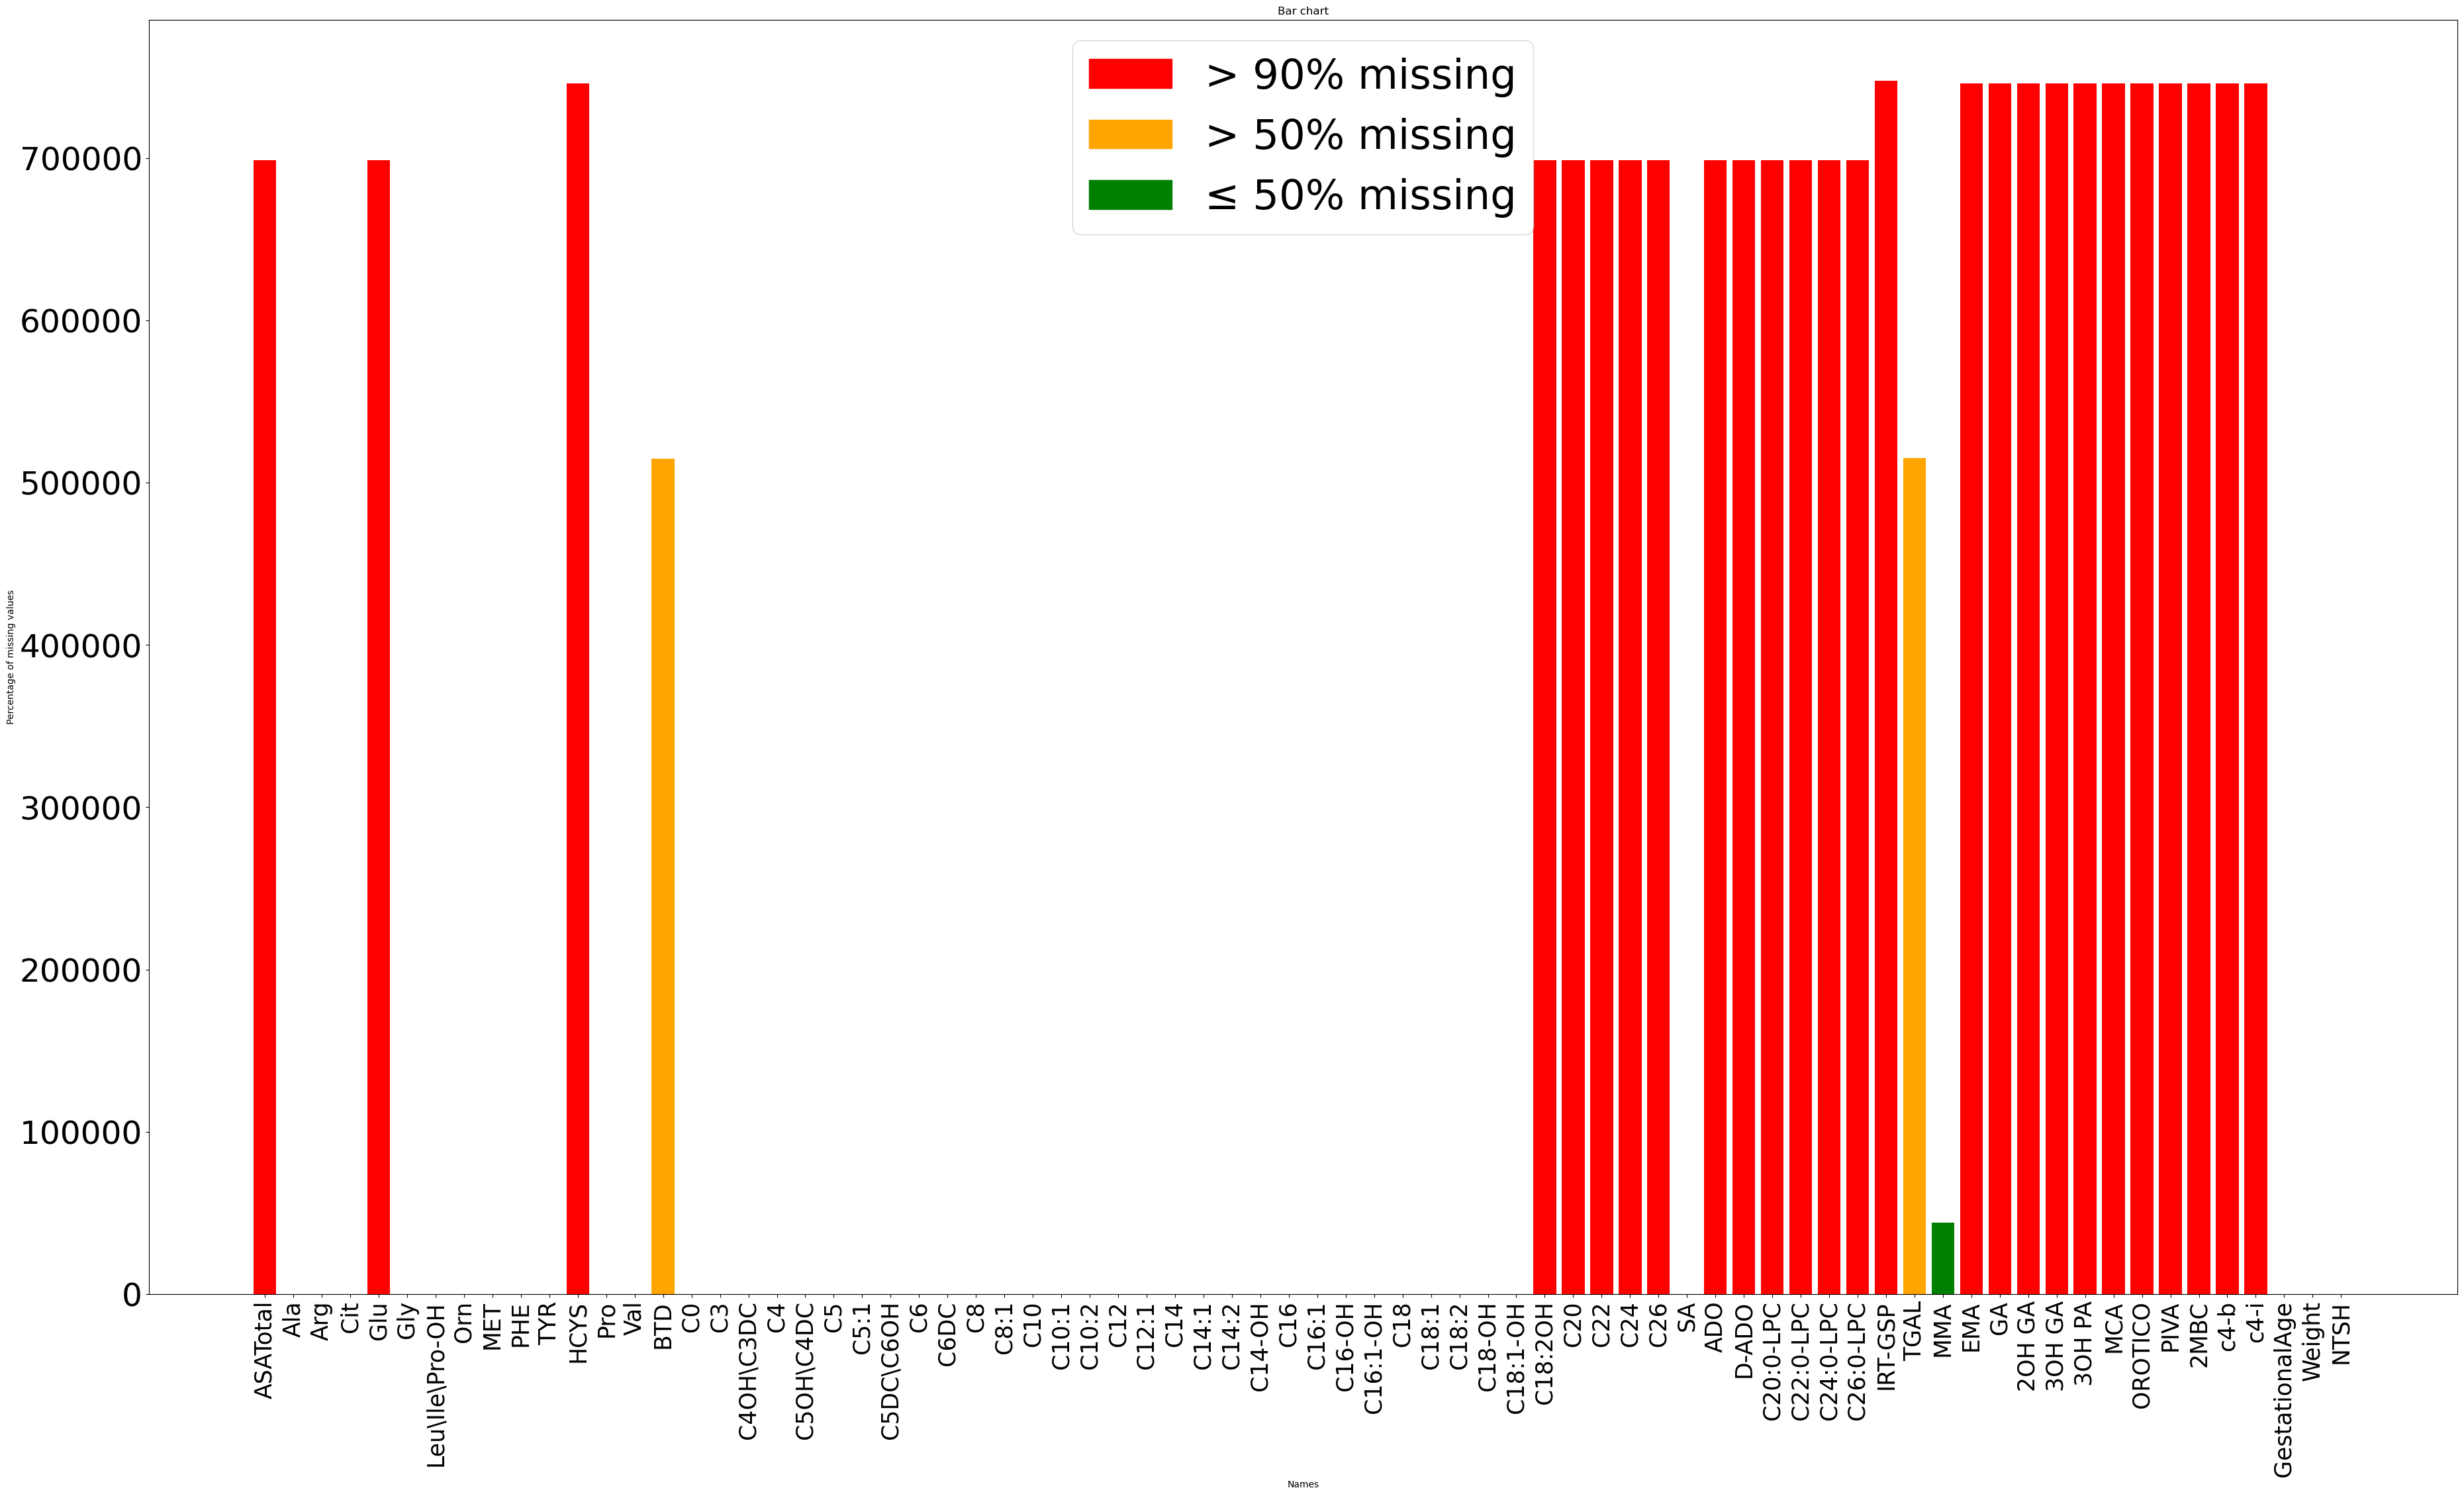

In [111]:
import matplotlib.patches as mpatches

i = 0
x = colonne_numeriche
colors = []
y = []

for val in colonne_numeriche:
    percentage = (babies_def2[val].null_count()/babies_def2.shape[0])*100
    if percentage > 90:
        colors.append('red')
        i = i+1
    elif percentage > 50:
        colors.append('orange')
    else:
        colors.append('green')
    y.append(babies_def2[val].null_count())

plt.figure(figsize=(45, 25))
plt.bar(x, y, color = colors, width= 0.8)
plt.xlabel('Names')
plt.ylabel('Percentage of missing values')
plt.title('Bar chart')
plt.xticks(rotation=90, fontsize = 25)
plt.yticks(fontsize= 35)

red_patch = mpatches.Patch(color='red', label='> 90% missing')
orange_patch = mpatches.Patch(color='orange', label='> 50% missing')
green_patch = mpatches.Patch(color='green', label='≤ 50% missing')

plt.legend(handles=[red_patch, orange_patch, green_patch], fontsize=45, loc = 'upper center', frameon=True)

plt.savefig('missing_new2.png')
plt.show()

In [112]:
set(colors)

{'green', 'orange', 'red'}

In [113]:
perc = []

for val in babies_def2.columns:
    percentage = (babies_def2[val].null_count()/babies_def2.shape[0])*100
    perc.append([percentage, val])

In [114]:
perc

[[93.33218470020675, 'ASATotal'],
 [0.01642812494991425, 'Ala'],
 [0.01642812494991425, 'Arg'],
 [0.01642812494991425, 'Cit'],
 [93.33218470020675, 'Glu'],
 [0.01642812494991425, 'Gly'],
 [0.01642812494991425, 'Leu\\Ile\\Pro-OH'],
 [0.01642812494991425, 'Orn'],
 [0.01642812494991425, 'MET'],
 [0.016027438975526102, 'PHE'],
 [0.016161000966988817, 'TYR'],
 [99.62549217593853, 'HCYS'],
 [0.01642812494991425, 'Pro'],
 [0.01642812494991425, 'Val'],
 [68.74262069997168, 'BTD'],
 [0.01642812494991425, 'C0'],
 [0.01642812494991425, 'C3'],
 [0.016561686941376972, 'C4OH\\C3DC'],
 [0.01642812494991425, 'C4'],
 [0.016561686941376972, 'C5OH\\C4DC'],
 [0.01642812494991425, 'C5'],
 [0.01642812494991425, 'C5:1'],
 [0.016561686941376972, 'C5DC\\C6OH'],
 [0.01642812494991425, 'C6'],
 [0.01642812494991425, 'C6DC'],
 [0.01642812494991425, 'C8'],
 [0.01642812494991425, 'C8:1'],
 [0.01642812494991425, 'C10'],
 [0.01642812494991425, 'C10:1'],
 [0.01642812494991425, 'C10:2'],
 [0.01642812494991425, 'C12'],
 

#### Statistics

In [116]:
statistics_tot = babies_def2[colonne_numeriche].describe()
iq99 = babies_def2.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = babies_def2.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = babies_def2.select(pl.col(colonne_numeriche).kurtosis())
ske = babies_def2.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_tot = pl.concat([statistics_tot, more_stat])
statistics_tot = statistics_tot.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col) for col in more_stat.columns])

In [117]:
header = statistics_tot["statistic"].to_list()

index = statistics_tot.transpose(include_header=True)

index.columns = ['Name'] + header
index[1:]

shape: (74, 14)
┌─────────────┬──────────┬────────────┬──────────┬───┬───────────┬─────────┬────────────┬──────────┐
│ Name        ┆ count    ┆ null_count ┆ mean     ┆ … ┆ 99%       ┆ 1%      ┆ Kurtosis   ┆ Skewness │
│ ---         ┆ ---      ┆ ---        ┆ ---      ┆   ┆ ---       ┆ ---     ┆ ---        ┆ ---      │
│ str         ┆ str      ┆ str        ┆ str      ┆   ┆ str       ┆ str     ┆ str        ┆ str      │
╞═════════════╪══════════╪════════════╪══════════╪═══╪═══════════╪═════════╪════════════╪══════════╡
│ ASATotal    ┆ 49923.0  ┆ 698793.0   ┆ 0.287    ┆ … ┆ 1.032     ┆ 0.095   ┆ 27.357     ┆ 3.926    │
│ Ala         ┆ 748593.0 ┆ 123.0      ┆ 344.391  ┆ … ┆ 532.802   ┆ 123.89  ┆ 492975.745 ┆ 638.097  │
│ Arg         ┆ 748593.0 ┆ 123.0      ┆ 10.884   ┆ … ┆ 36.85     ┆ 1.0     ┆ 745242.791 ┆ 862.322  │
│ Cit         ┆ 748593.0 ┆ 123.0      ┆ 14.302   ┆ … ┆ 30.61     ┆ 4.35    ┆ 22212.96   ┆ 120.765  │
│ Glu         ┆ 49923.0  ┆ 698793.0   ┆ 249.371  ┆ … ┆ 443.754   ┆ 129.825 ┆ 49578.527  ┆ 222.288  │
│ Gly         ┆ 748593.0 ┆ 123.0      ┆ 554.746  ┆ … ┆ 901.62    ┆ 165.8   ┆ 5910.235   ┆ 73.346   │
│ Leu\Ile\Pro ┆ 748593.0 ┆ 123.0      ┆ 187.116  ┆ … ┆ 266.04    ┆ 78.48   ┆ 6989.443   ┆ 79.064   │
│ -OH         ┆          ┆            ┆          ┆   ┆           ┆         ┆            ┆          │
│ Orn         ┆ 748593.0 ┆ 123.0      ┆ 127.54   ┆ … ┆ 271.1     ┆ 42.52   ┆ 21635.417  ┆ 132.982  │
│ MET         ┆ 748593.0 ┆ 123.0      ┆ 20.285   ┆ … ┆ 38.04     ┆ 8.719   ┆ 627662.716 ┆ 760.44   │
│ PHE         ┆ 748596.0 ┆ 120.0      ┆ 61.574   ┆ … ┆ 96.43     ┆ 33.58   ┆ 88851.524  ┆ 265.908  │
│ TYR         ┆ 748595.0 ┆ 121.0      ┆ 130.735  ┆ … ┆ 234.26    ┆ 38.58   ┆ 719652.352 ┆ 840.413  │
│ HCYS        ┆ 2804.0   ┆ 745912.0   ┆ 3.191    ┆ … ┆ 9.769     ┆ 0.795   ┆ 317.472    ┆ 13.108   │
│ Pro         ┆ 748593.0 ┆ 123.0      ┆ 236.546  ┆ … ┆ 321.72    ┆ 98.198  ┆ 460305.009 ┆ 608.582  │
│ Val         ┆ 748593.0 ┆ 123.0      ┆ 490.205  ┆ … ┆ 257.22    ┆ 65.88   ┆ 748420.783 ┆ 865.066  │
│ BTD         ┆ 234029.0 ┆ 514687.0   ┆ 243.72   ┆ … ┆ 354.346   ┆ 109.605 ┆ -0.411     ┆ -0.276   │
│ C0          ┆ 748593.0 ┆ 123.0      ┆ 19.546   ┆ … ┆ 49.48     ┆ 6.87    ┆ 9066.958   ┆ 83.124   │
│ C3          ┆ 748593.0 ┆ 123.0      ┆ 2.123    ┆ … ┆ 5.36      ┆ 0.73    ┆ 176934.185 ┆ 351.231  │
│ C4OH\C3DC   ┆ 748592.0 ┆ 124.0      ┆ 0.196    ┆ … ┆ 0.47      ┆ 0.05    ┆ 157.604    ┆ 2.68     │
│ C4          ┆ 748593.0 ┆ 123.0      ┆ 0.25     ┆ … ┆ 0.72      ┆ 0.07    ┆ 4119.7     ┆ 24.656   │
│ C5OH\C4DC   ┆ 748592.0 ┆ 124.0      ┆ 0.206    ┆ … ┆ 0.42      ┆ 0.08    ┆ 12628.54   ┆ 59.509   │
│ C5          ┆ 748593.0 ┆ 123.0      ┆ 0.116    ┆ … ┆ 0.36      ┆ 0.04    ┆ 4083.74    ┆ 32.7     │
│ C5:1        ┆ 748593.0 ┆ 123.0      ┆ 0.009    ┆ … ┆ 0.03      ┆ 0.0     ┆ 2186.595   ┆ 18.425   │
│ C5DC\C6OH   ┆ 748592.0 ┆ 124.0      ┆ 0.13     ┆ … ┆ 0.27      ┆ 0.05    ┆ 10838.19   ┆ 44.52    │
│ C6          ┆ 748593.0 ┆ 123.0      ┆ 0.047    ┆ … ┆ 0.11      ┆ 0.01    ┆ 4953.929   ┆ 31.584   │
│ C6DC        ┆ 748593.0 ┆ 123.0      ┆ 0.125    ┆ … ┆ 0.28      ┆ 0.03    ┆ 7805.915   ┆ 29.884   │
│ C8          ┆ 748593.0 ┆ 123.0      ┆ 0.064    ┆ … ┆ 0.18      ┆ 0.02    ┆ 84791.393  ┆ 263.948  │
│ C8:1        ┆ 748593.0 ┆ 123.0      ┆ 0.035    ┆ … ┆ 0.12      ┆ 0.01    ┆ 42.367     ┆ 3.449    │
│ C10         ┆ 748593.0 ┆ 123.0      ┆ 0.095    ┆ … ┆ 0.27      ┆ 0.03    ┆ 2715.917   ┆ 15.978   │
│ C10:1       ┆ 748593.0 ┆ 123.0      ┆ 0.049    ┆ … ┆ 0.11      ┆ 0.02    ┆ 91.709     ┆ 3.906    │
│ C10:2       ┆ 748593.0 ┆ 123.0      ┆ 0.003    ┆ … ┆ 0.02      ┆ 0.0     ┆ 1543.468   ┆ 14.98    │
│ C12         ┆ 748593.0 ┆ 123.0      ┆ 0.123    ┆ … ┆ 0.36      ┆ 0.03    ┆ 896.179    ┆ 7.727    │
│ C12:1       ┆ 748593.0 ┆ 123.0      ┆ 0.091    ┆ … ┆ 0.29      ┆ 0.02    ┆ 13.868     ┆ 2.305    │
│ C14         ┆ 748593.0 ┆ 123.0      ┆ 0.239    ┆ … ┆ 0.501     ┆ 0.1     ┆ 386.642    ┆ 5.314    │
│ C14:1       ┆ 748593.0 ┆ 123.0      ┆ 0.131

In [118]:
sel = index['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [119]:
statistics_tot_pandas = sel.to_pandas()

# Esporta come tabella LaTeX
statistiche_totali = statistics_tot_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("statistiche totali.tex", "w") as f:
    f.write(statistiche_totali)

In [120]:
colonne_numeriche

['ASATotal',
 'Ala',
 'Arg',
 'Cit',
 'Glu',
 'Gly',
 'Leu\\Ile\\Pro-OH',
 'Orn',
 'MET',
 'PHE',
 'TYR',
 'HCYS',
 'Pro',
 'Val',
 'BTD',
 'C0',
 'C3',
 'C4OH\\C3DC',
 'C4',
 'C5OH\\C4DC',
 'C5',
 'C5:1',
 'C5DC\\C6OH',
 'C6',
 'C6DC',
 'C8',
 'C8:1',
 'C10',
 'C10:1',
 'C10:2',
 'C12',
 'C12:1',
 'C14',
 'C14:1',
 'C14:2',
 'C14-OH',
 'C16',
 'C16:1',
 'C16-OH',
 'C16:1-OH',
 'C18',
 'C18:1',
 'C18:2',
 'C18-OH',
 'C18:1-OH',
 'C18:2OH',
 'C20',
 'C22',
 'C24',
 'C26',
 'SA',
 'ADO',
 'D-ADO',
 'C20:0-LPC',
 'C22:0-LPC',
 'C24:0-LPC',
 'C26:0-LPC',
 'IRT-GSP',
 'TGAL',
 'MMA',
 'EMA',
 'GA',
 '2OH GA',
 '3OH GA',
 '3OH PA',
 'MCA',
 'OROTICO',
 'PIVA',
 '2MBC',
 'c4-b',
 'c4-i',
 'GestationalAge',
 'Weight',
 'NTSH']

group_c = ['C0', 'C3', 'C4OH\\C3DC', 'C4', 'C5OH\\C4DC', 'C5', 'C5:1', 'C5DC\\C6OH', 'C6', 'C6DC', 'C8', 'C8:1', 'C10', 'C10:1', 'C10:2', 'C12', 'C12:1', 'C14', 'C14:1', 'C14:2', 'C14-OH', 'C16', 'C16:1', 'C16-OH', 'C16:1-OH', 'C18', 'C18:1', 'C18:2', 'C18-OH', 'C18:1-OH']

In [122]:
babies_def2 = babies_def2.drop('check')

In [123]:
babies_def2.write_csv('Dataset_Paper.csv')

### Wheight

#### Bambini che pesano meno di 1,5 kg

In [126]:
extra_piccoli = babies_def2.filter(pl.col('Weight') < 1500)

In [127]:
extra_piccoli.shape

(5966, 100)

In [128]:
statistics_ppp2 = extra_piccoli[colonne_numeriche].describe()
iq99 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = extra_piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = extra_piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = extra_piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_ppp2 = pl.concat([statistics_ppp2, more_stat])
statistics_ppp2 = statistics_ppp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [129]:
statistics_ppp2

shape: (13, 75)
┌────────────┬──────────┬────────────┬────────────┬───┬────────┬─────────────┬──────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala        ┆ Arg        ┆ … ┆ c4-i   ┆ Gestational ┆ Weight   ┆ NTSH     │
│ ---        ┆ ---      ┆ ---        ┆ ---        ┆   ┆ ---    ┆ Age         ┆ ---      ┆ ---      │
│ str        ┆ f64      ┆ f64        ┆ f64        ┆   ┆ f64    ┆ ---         ┆ f64      ┆ f64      │
│            ┆          ┆            ┆            ┆   ┆        ┆ f64         ┆          ┆          │
╞════════════╪══════════╪════════════╪════════════╪═══╪════════╪═════════════╪══════════╪══════════╡
│ count      ┆ 363.0    ┆ 5966.0     ┆ 5966.0     ┆ … ┆ 37.0   ┆ 5966.0      ┆ 5966.0   ┆ 5966.0   │
│ null_count ┆ 5603.0   ┆ 0.0        ┆ 0.0        ┆ … ┆ 5929.0 ┆ 0.0         ┆ 0.0      ┆ 0.0      │
│ mean       ┆ 0.373    ┆ 730.557    ┆ 117.452    ┆ … ┆ 1.196  ┆ 29.775      ┆ 1154.136 ┆ 2.055    │
│ std        ┆ 0.213    ┆ 12666.073  ┆ 6388.356   ┆ … ┆ 5.732  ┆ 2.905       ┆ 280.631  ┆ 4.8      │
│ min        ┆ 0.092    ┆ 0.0        ┆ 0.0        ┆ … ┆ 0.052  ┆ 23.0        ┆ 350.0    ┆ 0.0      │
│ 25%        ┆ 0.247    ┆ 189.26     ┆ 13.14      ┆ … ┆ 0.161  ┆ 28.0        ┆ 956.0    ┆ 0.916    │
│ 50%        ┆ 0.321    ┆ 248.6      ┆ 24.37      ┆ … ┆ 0.244  ┆ 30.0        ┆ 1210.0   ┆ 1.571    │
│ 75%        ┆ 0.448    ┆ 337.76     ┆ 40.7       ┆ … ┆ 0.38   ┆ 32.0        ┆ 1400.0   ┆ 2.54     │
│ max        ┆ 2.514    ┆ 519538.705 ┆ 493407.175 ┆ … ┆ 35.115 ┆ 41.0        ┆ 1499.0   ┆ 348.0    │
│ 99%        ┆ 1.12     ┆ 818.36     ┆ 139.26     ┆ … ┆ 35.115 ┆ 36.0        ┆ 1495.0   ┆ 8.15     │
│ 1%         ┆ 0.124    ┆ 91.78      ┆ 2.45       ┆ … ┆ 0.052  ┆ 23.0        ┆ 460.0    ┆ 0.186    │
│ Kurtosis   ┆ 29.796   ┆ 975.504    ┆ 5957.934   ┆ … ┆ 31.998 ┆ -0.012      ┆ -0.579   ┆ 4520.995 │
│ Skewness   ┆ 3.894    ┆ 30.332     ┆ 77.191     ┆ … ┆ 5.829  ┆ -0.008      ┆ -0.637   ┆ 62.949   │
└────────────┴──────────┴────────────┴────────────┴───┴────────┴─────────────┴──────────┴──────────┘

In [130]:
header = statistics_ppp2["statistic"].to_list()

prova = statistics_ppp2.transpose(include_header=True)

prova.columns = ['Name'] + header
prova[1:]

prova_bis = prova['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [131]:
statistics_ppp2_pandas = prova_bis.to_pandas()

# Esporta come tabella LaTeX
statistiche_1500 = statistics_ppp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("extra_piccoli.tex", "w") as f:
    f.write(statistiche_1500)

In [132]:
len(colonne_numeriche)

74

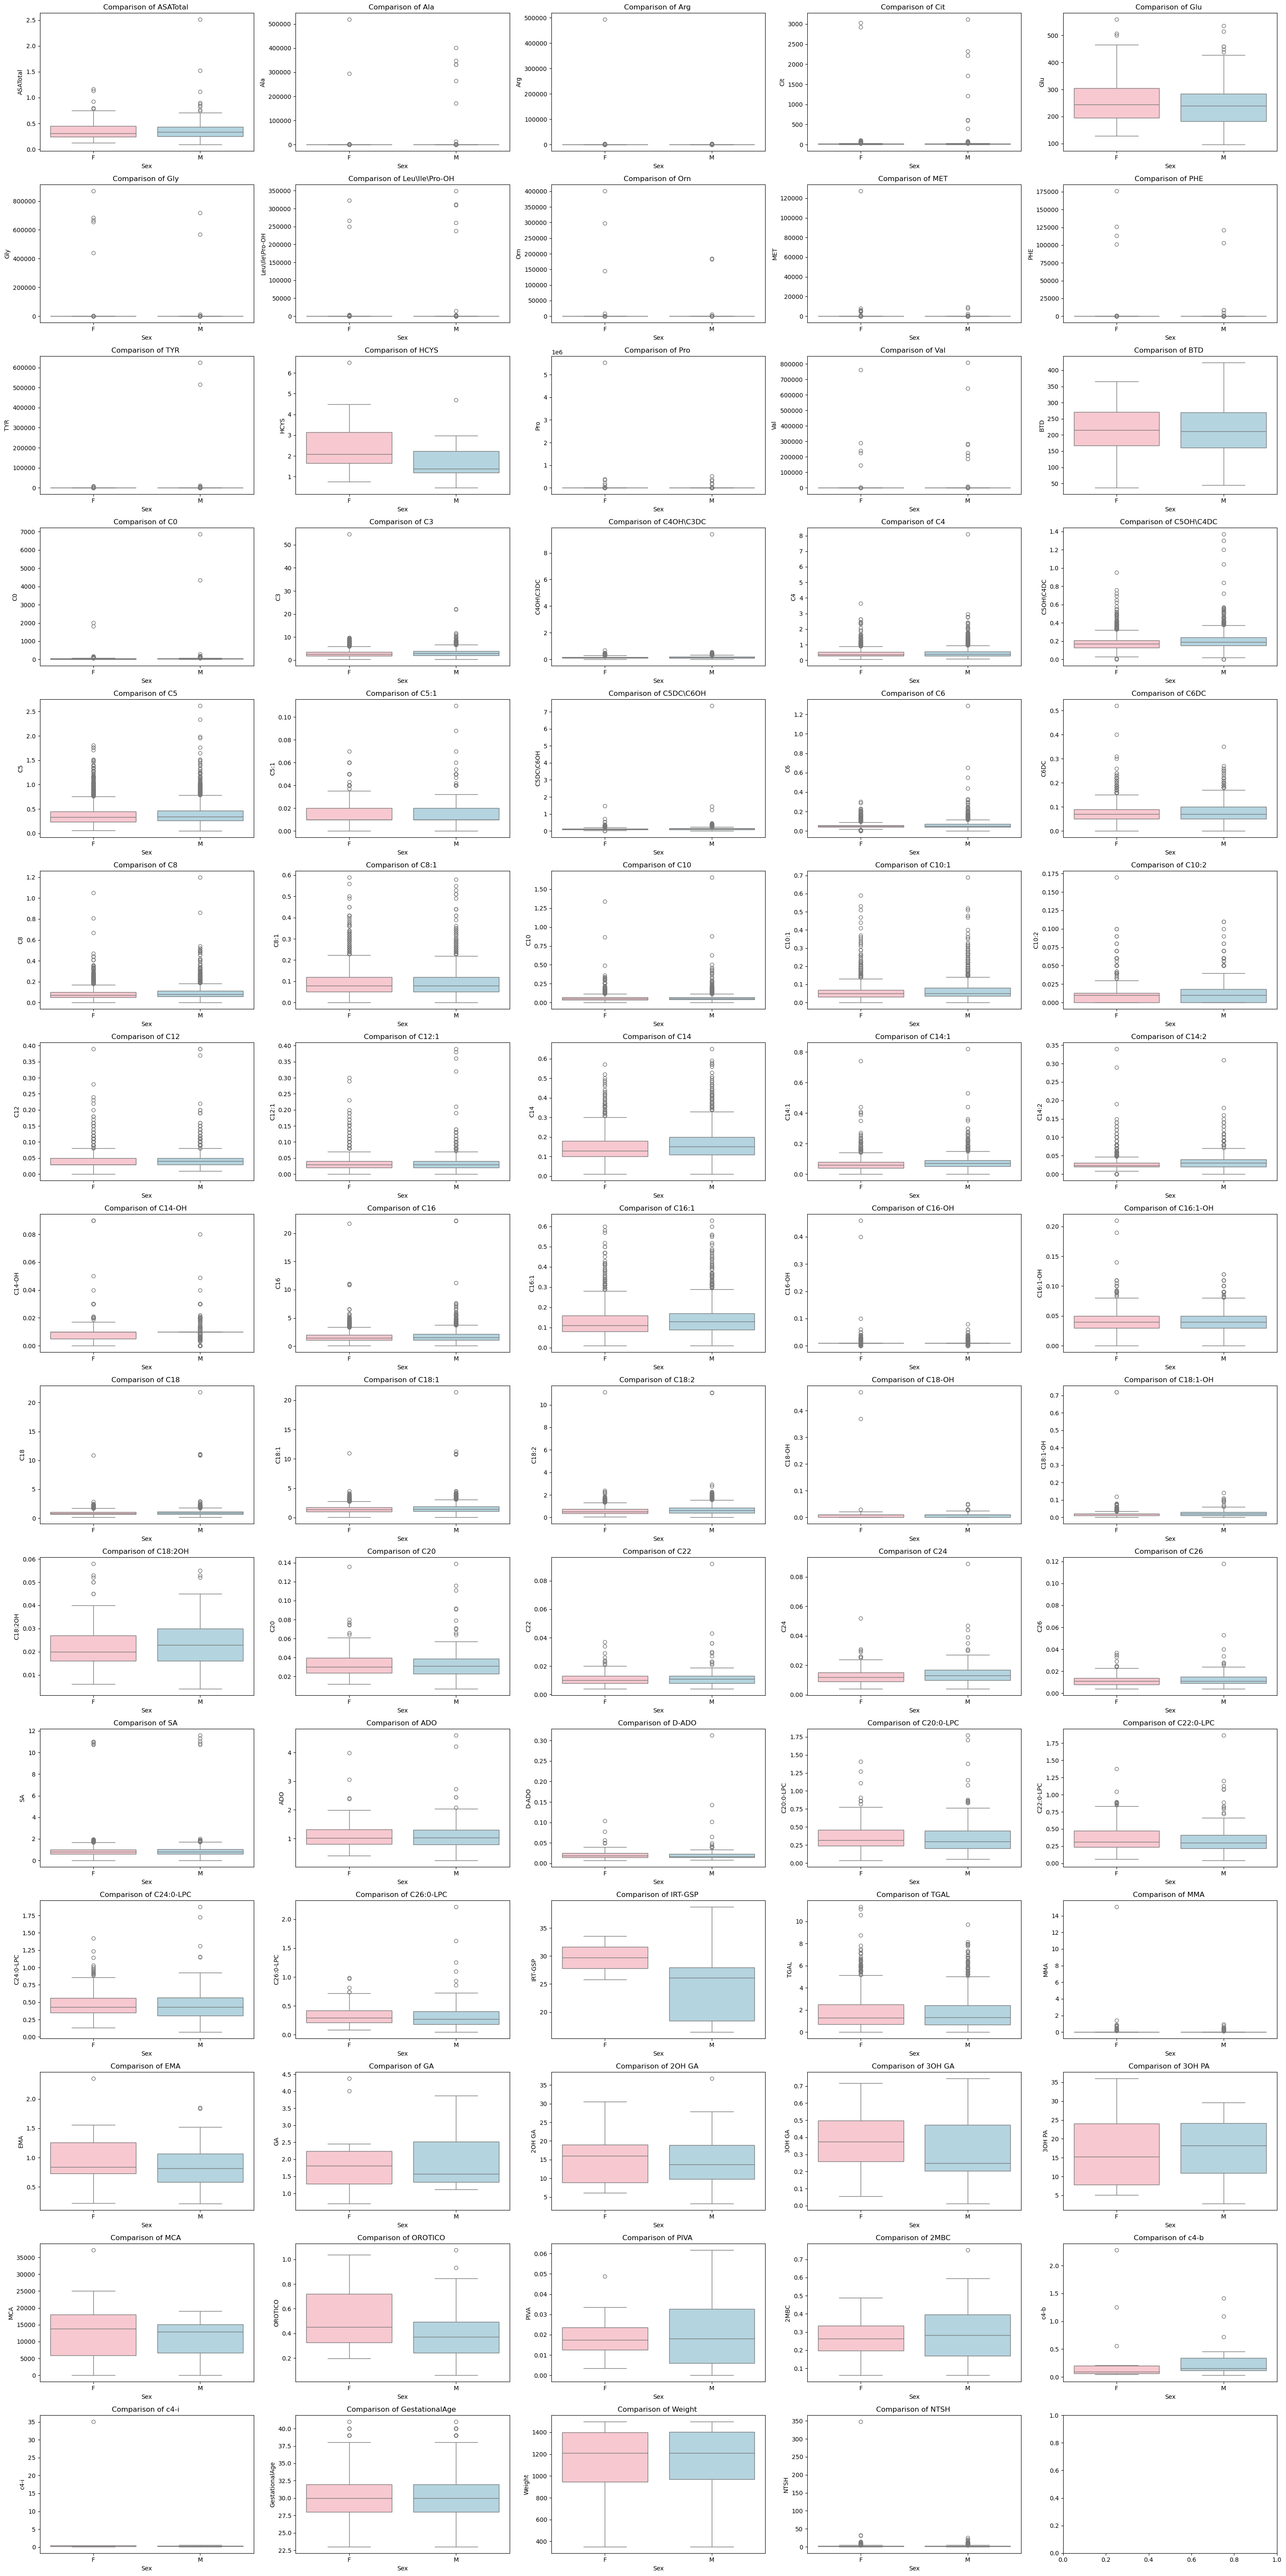

In [133]:
extra_piccoli_pandas = extra_piccoli.to_pandas()

fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 

i, j = 0, 0  # Assicurati di inizializzare `i` e `j` correttamente per indicizzare gli assi
for col in colonne_numeriche: 
    sns.boxplot(
        x='Sex', 
        y=col, 
        ax=axes[i, j], 
        data=extra_piccoli_pandas, 
        hue='Sex', 
        palette={'M': 'lightblue', 'F': 'pink'}
    )  
    axes[i, j].set_title(f'Comparison of {col} ')
    j += 1
    if j == 5:  # Passa alla riga successiva
        i += 1
        j = 0

plt.tight_layout()
plt.savefig('Extrapiccoli.png')
plt.show()


#### Bambini che pesano tra 2 e 1,5 kg

In [294]:
piccoli_pic = babies_def2.filter((pl.col('Weight') >= 1500) & (pl.col('Weight') < 2000))
piccoli_pic.shape

(9172, 100)

In [296]:
statistics_pp2 = piccoli_pic[colonne_numeriche].describe()
iq99 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli_pic.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli_pic.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli_pic.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_pp2 = pl.concat([statistics_pp2, more_stat])
statistics_pp2 = statistics_pp2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])

In [300]:
statistics_pp2

shape: (13, 75)
┌────────────┬──────────┬───────────┬─────────┬───┬────────┬────────────────┬──────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala       ┆ Arg     ┆ … ┆ c4-i   ┆ GestationalAge ┆ Weight   ┆ NTSH     │
│ ---        ┆ ---      ┆ ---       ┆ ---     ┆   ┆ ---    ┆ ---            ┆ ---      ┆ ---      │
│ str        ┆ f64      ┆ f64       ┆ f64     ┆   ┆ f64    ┆ f64            ┆ f64      ┆ f64      │
╞════════════╪══════════╪═══════════╪═════════╪═══╪════════╪════════════════╪══════════╪══════════╡
│ count      ┆ 537.0    ┆ 9168.0    ┆ 9168.0  ┆ … ┆ 46.0   ┆ 9172.0         ┆ 9172.0   ┆ 9172.0   │
│ null_count ┆ 8635.0   ┆ 4.0       ┆ 4.0     ┆ … ┆ 9126.0 ┆ 0.0            ┆ 0.0      ┆ 0.0      │
│ mean       ┆ 0.279    ┆ 353.673   ┆ 17.533  ┆ … ┆ 0.203  ┆ 33.912         ┆ 1805.237 ┆ 2.322    │
│ std        ┆ 0.207    ┆ 5363.066  ┆ 81.008  ┆ … ┆ 0.121  ┆ 1.99           ┆ 132.193  ┆ 3.501    │
│ min        ┆ 0.08     ┆ 0.0       ┆ 0.0     ┆ … ┆ 0.04   ┆ 23.0           ┆ 1500.0   ┆ 0.0      │
│ 25%        ┆ 0.176    ┆ 179.4     ┆ 5.21    ┆ … ┆ 0.105  ┆ 32.0           ┆ 1700.0   ┆ 1.117    │
│ 50%        ┆ 0.233    ┆ 231.74    ┆ 9.78    ┆ … ┆ 0.183  ┆ 34.0           ┆ 1825.0   ┆ 1.803    │
│ 75%        ┆ 0.306    ┆ 300.06    ┆ 18.68   ┆ … ┆ 0.236  ┆ 35.0           ┆ 1920.0   ┆ 2.898    │
│ max        ┆ 1.885    ┆ 384289.65 ┆ 5661.67 ┆ … ┆ 0.515  ┆ 41.0           ┆ 1999.0   ┆ 290.0    │
│ 99%        ┆ 1.271    ┆ 596.48    ┆ 82.89   ┆ … ┆ 0.515  ┆ 38.0           ┆ 1993.0   ┆ 8.68     │
│ 1%         ┆ 0.09     ┆ 89.23     ┆ 1.01    ┆ … ┆ 0.04   ┆ 30.0           ┆ 1520.0   ┆ 0.304    │
│ Kurtosis   ┆ 27.761   ┆ 3765.2    ┆ 2811.18 ┆ … ┆ 0.23   ┆ -0.136         ┆ -0.942   ┆ 4967.327 │
│ Skewness   ┆ 4.556    ┆ 59.228    ┆ 46.612  ┆ … ┆ 0.986  ┆ 0.003          ┆ -0.397   ┆ 60.865   │
└────────────┴──────────┴───────────┴─────────┴───┴────────┴────────────────┴──────────┴──────────┘

In [137]:
header = statistics_pp2["statistic"].to_list()

prova2 = statistics_pp2.transpose(include_header=True)

prova2.columns = ['Name'] + header
prova2[1:]
unoemezzodue = prova2['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [138]:
statistics_pp2_pandas = unoemezzodue.to_pandas()

# Esporta come tabella LaTeX
statistiche_2000 = statistics_pp2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("unoemezzodue_table.tex", "w") as f:
    f.write(statistiche_2000)

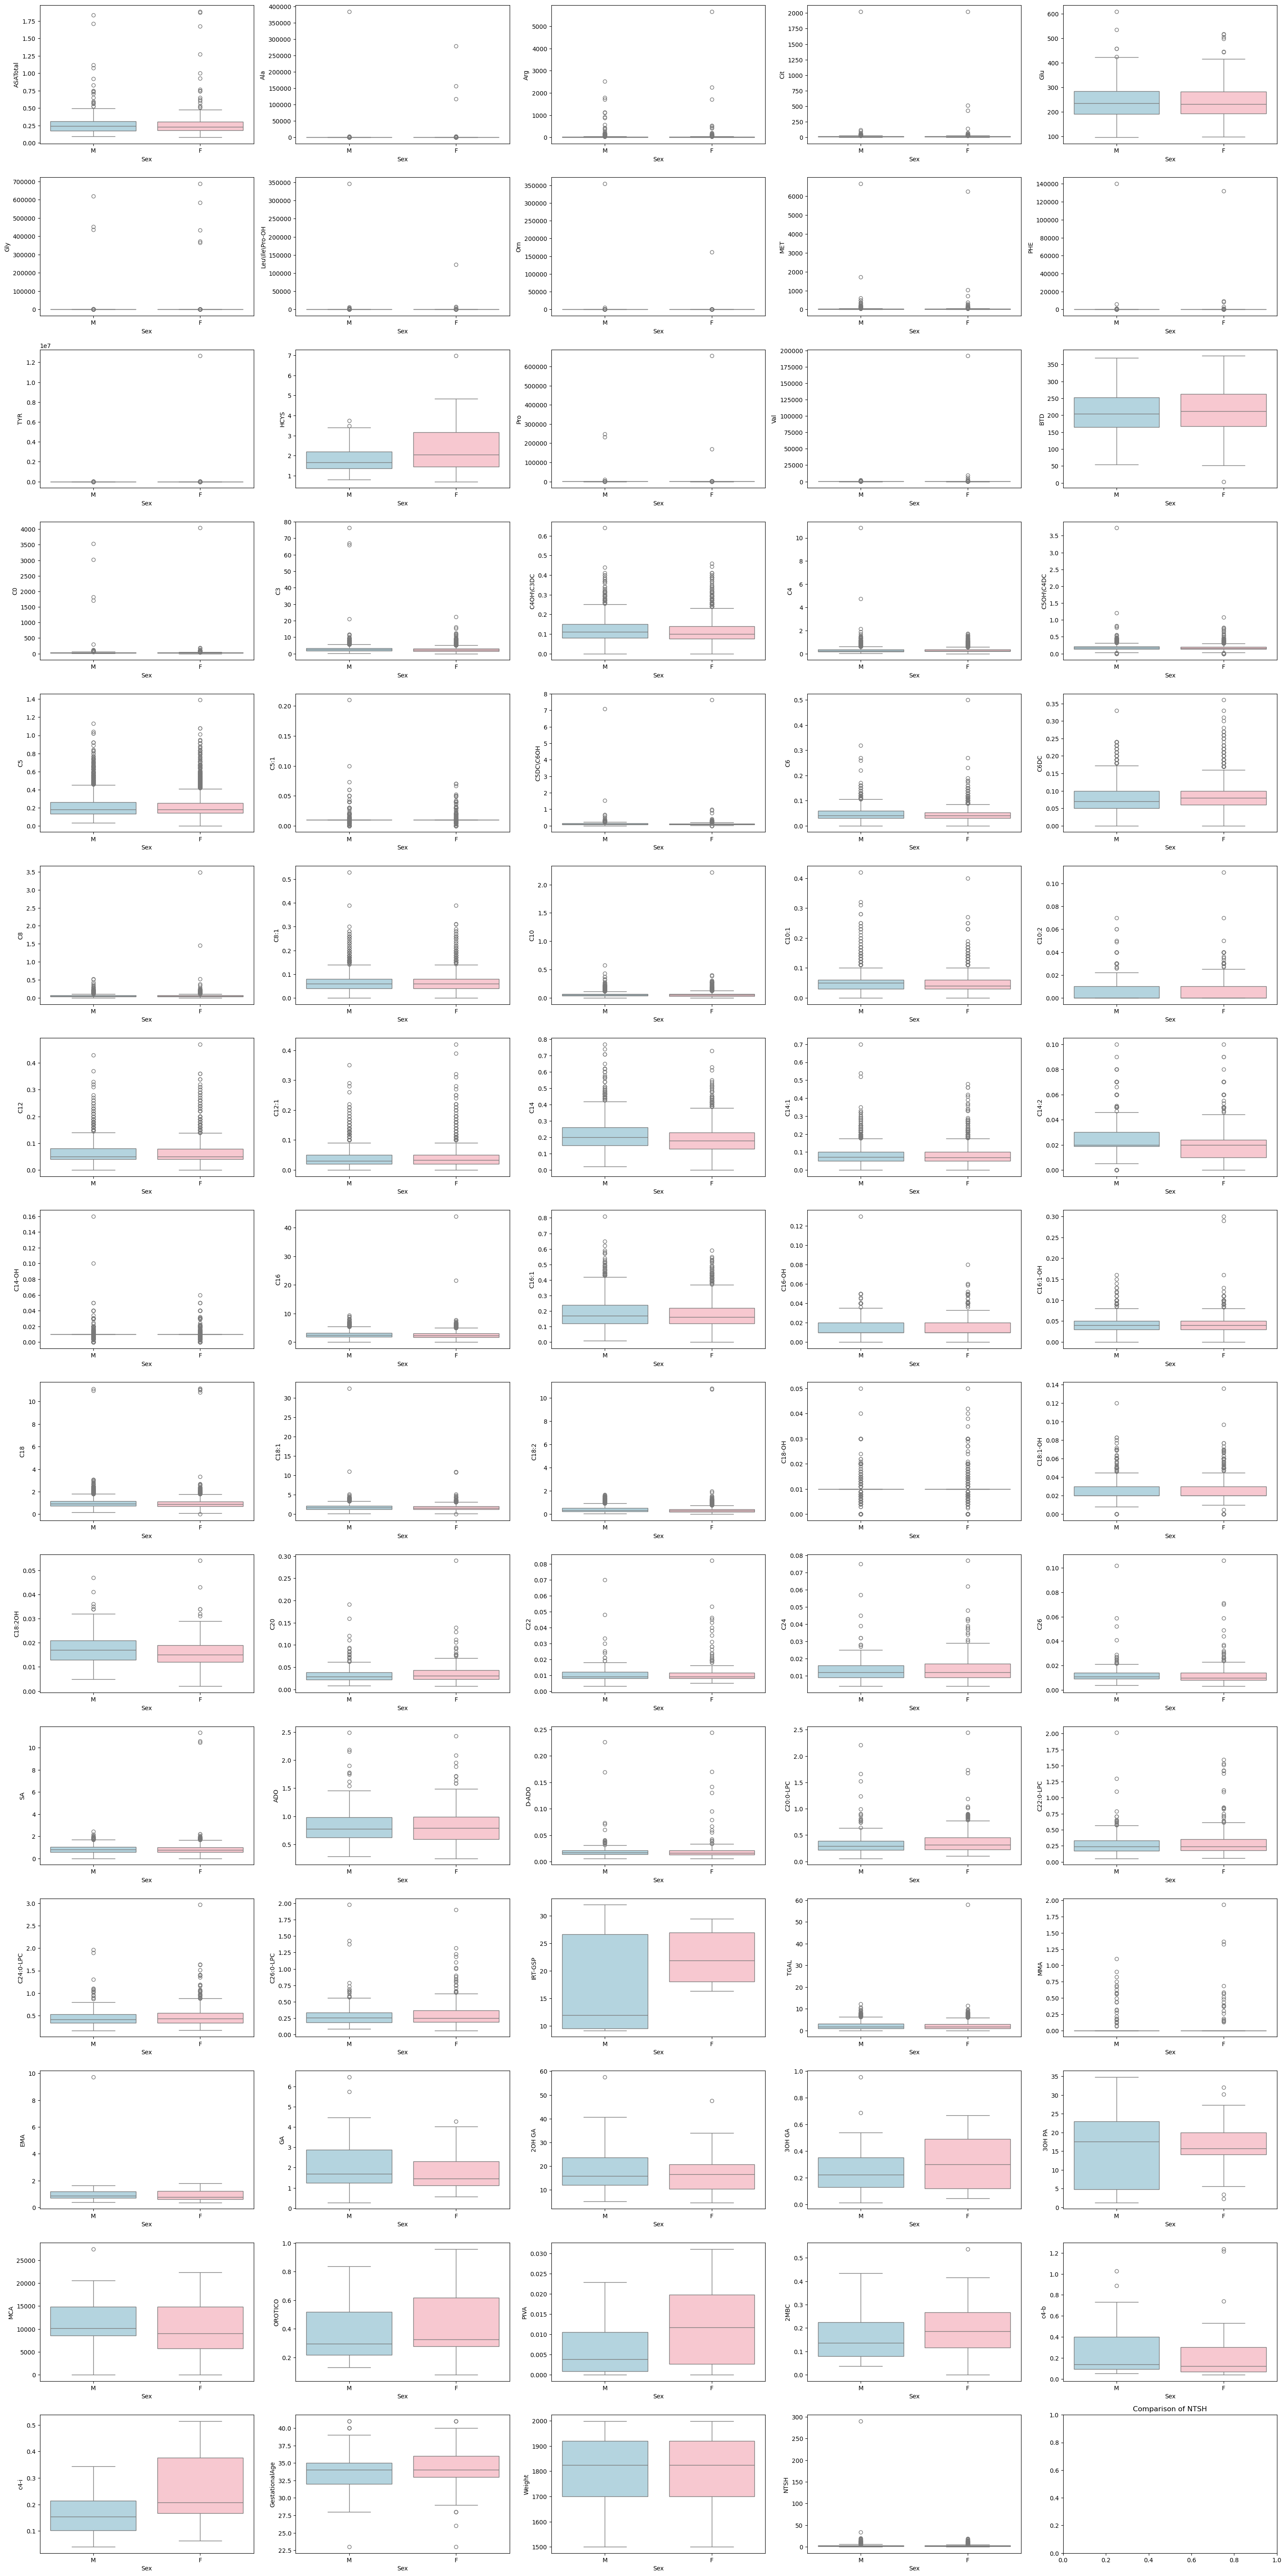

In [139]:
j = 0
i = 0
piccoli_picp = piccoli_pic.to_pandas()

fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 
for col in colonne_numeriche: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccoli_picp, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Comparison of {col}')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_piccoli.png')
plt.tight_layout()

####  Bambini che pesano tra 2 kg di 2,5 kg

In [141]:
piccoli = babies_def2.filter((pl.col('Weight') < 2500) & (pl.col('Weight') >= 2000))
piccoli.shape


(35527, 100)

In [142]:
statistics_p2 = piccoli[colonne_numeriche].describe()
iq99 = piccoli.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = piccoli.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = piccoli.select(pl.col(colonne_numeriche).kurtosis())
ske = piccoli.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_p2 = pl.concat([statistics_p2, more_stat])
statistics_p2 = statistics_p2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_p2

shape: (13, 75)
┌────────────┬──────────┬───────────┬──────────┬───┬─────────┬────────────────┬─────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala       ┆ Arg      ┆ … ┆ c4-i    ┆ GestationalAge ┆ Weight  ┆ NTSH     │
│ ---        ┆ ---      ┆ ---       ┆ ---      ┆   ┆ ---     ┆ ---            ┆ ---     ┆ ---      │
│ str        ┆ f64      ┆ f64       ┆ f64      ┆   ┆ f64     ┆ f64            ┆ f64     ┆ f64      │
╞════════════╪══════════╪═══════════╪══════════╪═══╪═════════╪════════════════╪═════════╪══════════╡
│ count      ┆ 2296.0   ┆ 35521.0   ┆ 35521.0  ┆ … ┆ 158.0   ┆ 35527.0        ┆ 35527.0 ┆ 35527.0  │
│ null_count ┆ 33231.0  ┆ 6.0       ┆ 6.0      ┆ … ┆ 35369.0 ┆ 0.0            ┆ 0.0     ┆ 0.0      │
│ mean       ┆ 0.269    ┆ 325.408   ┆ 10.914   ┆ … ┆ 0.151   ┆ 36.426         ┆ 2302.67 ┆ 2.706    │
│ std        ┆ 0.179    ┆ 4502.878  ┆ 53.557   ┆ … ┆ 0.093   ┆ 1.767          ┆ 137.88  ┆ 4.435    │
│ min        ┆ 0.05     ┆ 0.0       ┆ 0.0      ┆ … ┆ 0.007   ┆ 25.0           ┆ 2000.0  ┆ 0.0      │
│ 25%        ┆ 0.176    ┆ 194.69    ┆ 4.49     ┆ … ┆ 0.095   ┆ 35.0           ┆ 2200.0  ┆ 1.412    │
│ 50%        ┆ 0.232    ┆ 242.68    ┆ 7.8      ┆ … ┆ 0.134   ┆ 37.0           ┆ 2330.0  ┆ 2.207    │
│ 75%        ┆ 0.305    ┆ 302.13    ┆ 12.86    ┆ … ┆ 0.179   ┆ 38.0           ┆ 2420.0  ┆ 3.358    │
│ max        ┆ 2.692    ┆ 445301.98 ┆ 5661.43  ┆ … ┆ 0.76    ┆ 41.0           ┆ 2499.0  ┆ 415.0    │
│ 99%        ┆ 1.115    ┆ 541.324   ┆ 43.15    ┆ … ┆ 0.407   ┆ 40.0           ┆ 2490.0  ┆ 9.17     │
│ 1%         ┆ 0.091    ┆ 107.75    ┆ 0.99     ┆ … ┆ 0.032   ┆ 32.0           ┆ 2000.0  ┆ 0.403    │
│ Kurtosis   ┆ 36.733   ┆ 5443.927  ┆ 5927.453 ┆ … ┆ 12.947  ┆ -0.12          ┆ -0.853  ┆ 5002.723 │
│ Skewness   ┆ 4.749    ┆ 71.082    ┆ 71.477   ┆ … ┆ 2.753   ┆ -0.217         ┆ -0.5    ┆ 61.364   │
└────────────┴──────────┴───────────┴──────────┴───┴─────────┴────────────────┴─────────┴──────────┘

In [143]:
header = statistics_p2["statistic"].to_list()

prova3 = statistics_p2.transpose(include_header=True)

prova3.columns = ['Name'] + header
prova3[1:]

duemezzo = prova3['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [144]:
statistics_p2_pandas = duemezzo.to_pandas()
# Esporta come tabella LaTeX
statistiche_2500 = statistics_p2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("duemezzo_table.tex", "w") as f:
    f.write(statistiche_2500)

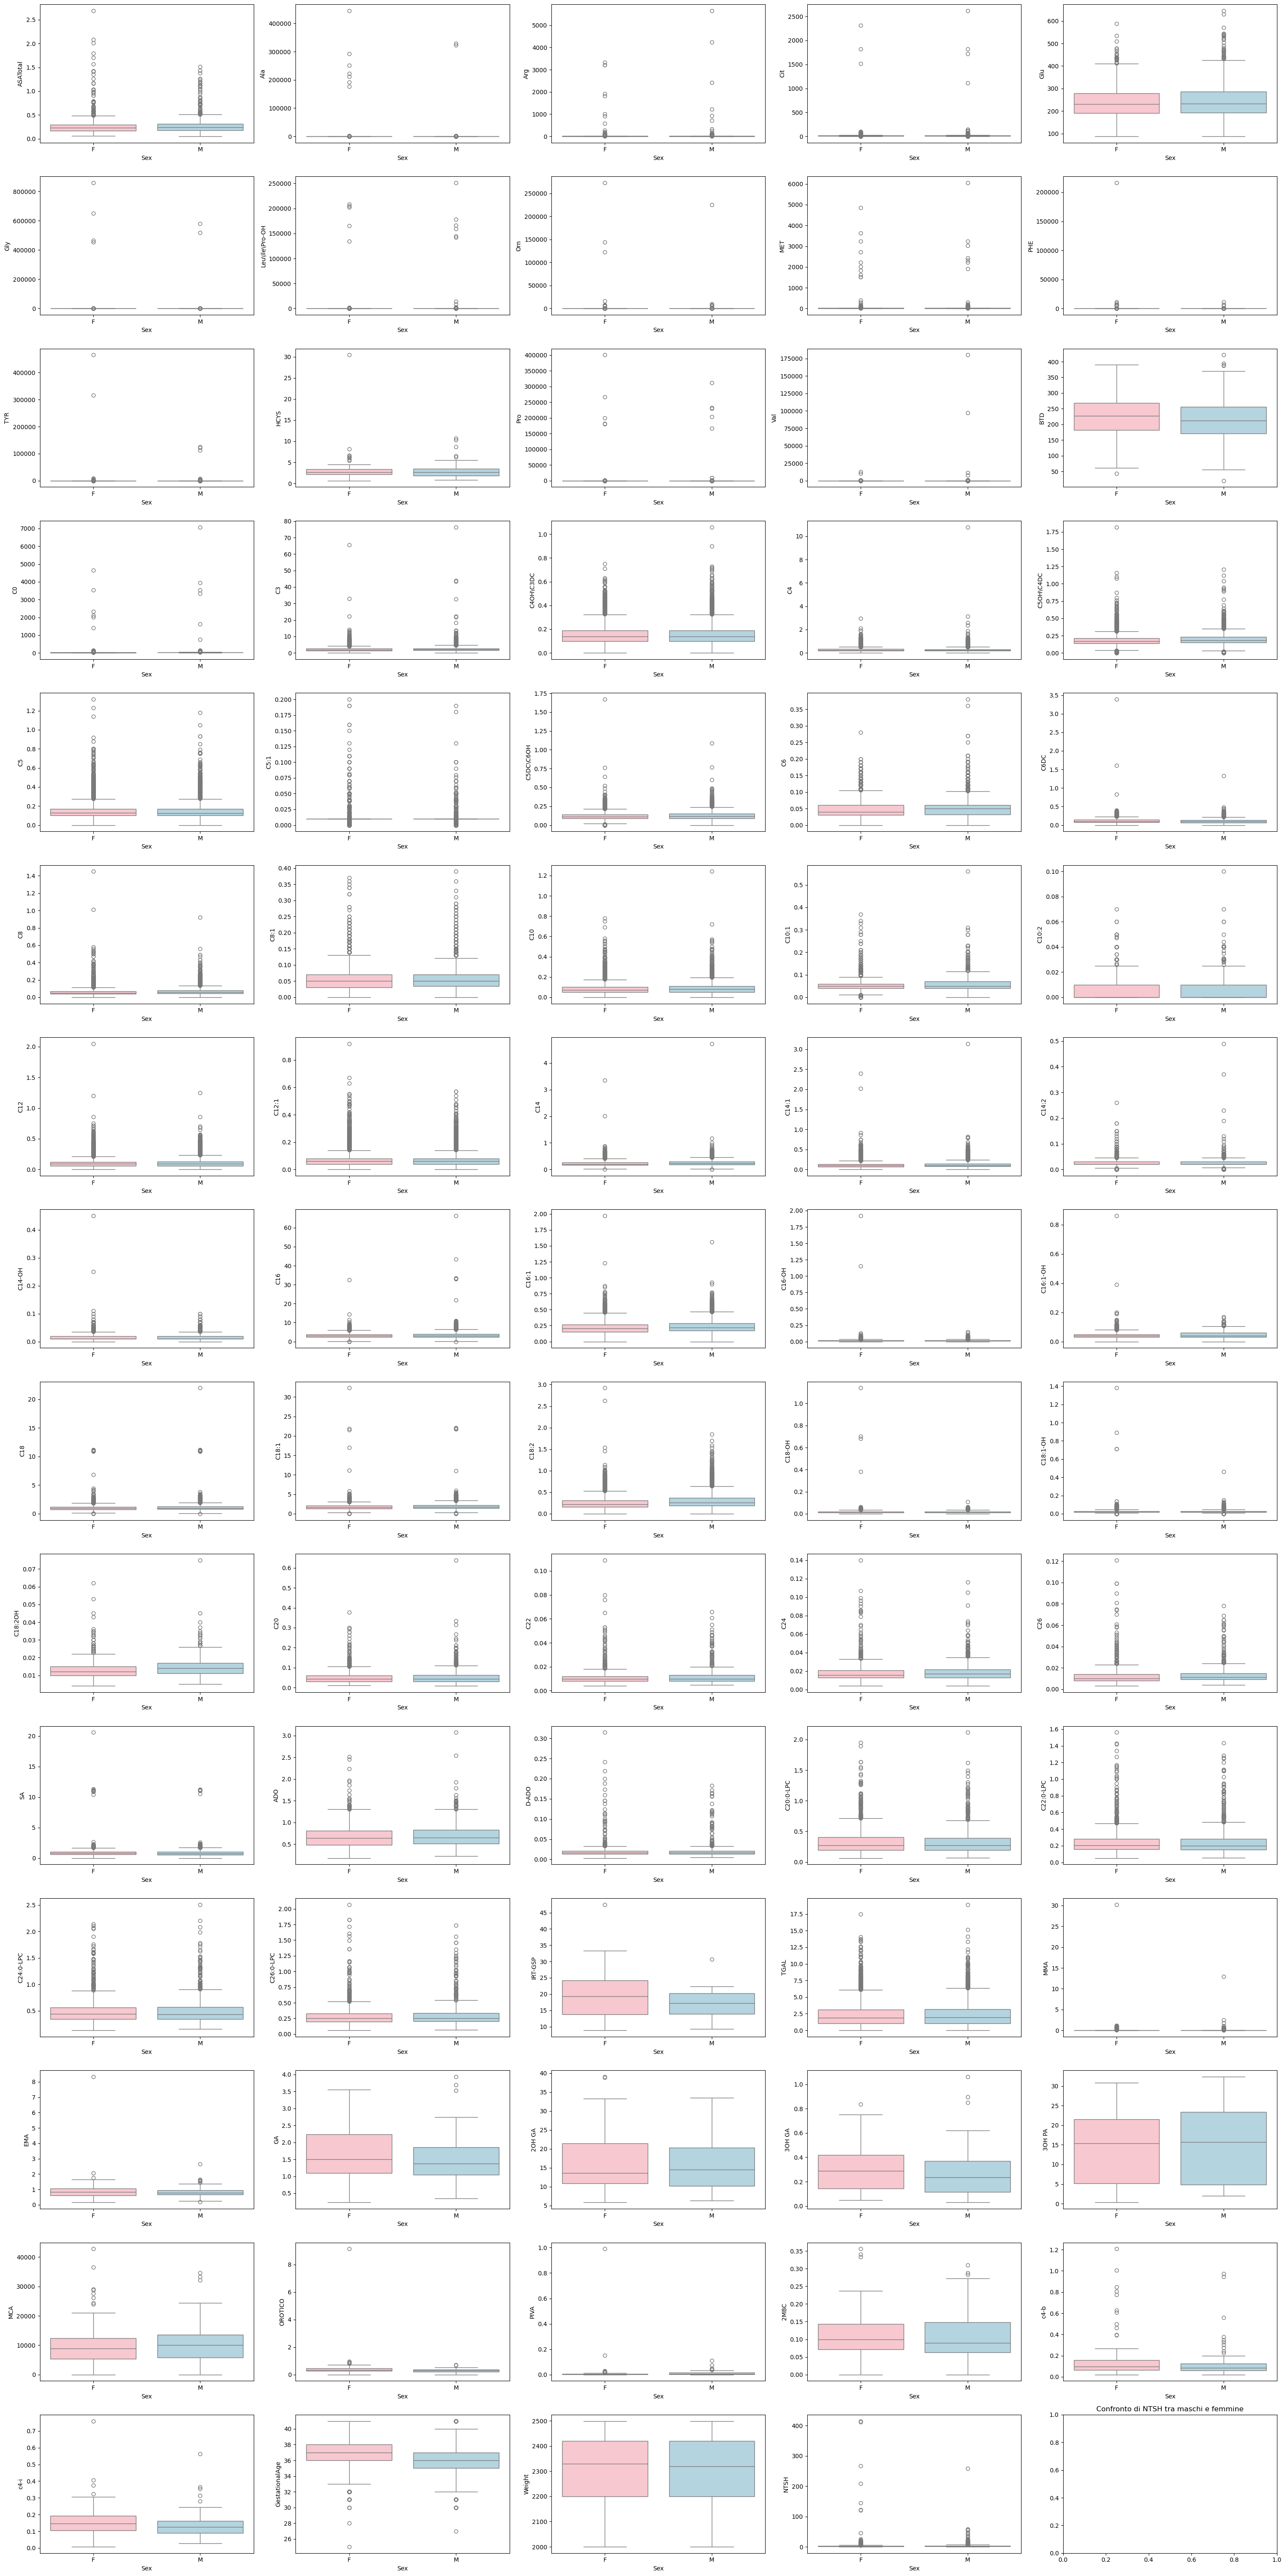

In [145]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 

piccolip = piccoli.to_pandas()

for col in colonne_numeriche: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=piccolip, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_medi.png')
plt.tight_layout()

#### Babies over 2,5kg 

In [147]:
ciccioni = babies_def2.filter(pl.col('Weight') >= 2500)
ciccioni.shape

(698051, 100)

In [148]:
statistics_c2 = ciccioni[colonne_numeriche].describe()
iq99 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.99))
iq01 = ciccioni.select(pl.col(colonne_numeriche).quantile(0.01))
kurt = ciccioni.select(pl.col(colonne_numeriche).kurtosis())
ske = ciccioni.select(pl.col(colonne_numeriche).skew())
more_stat = pl.concat([iq99, iq01, kurt, ske])
new_col = pl.Series("new_col",['99%','1%','Kurtosis','Skewness'])
more_stat = more_stat.with_columns([new_col])
more_stat = more_stat.rename({"new_col": "statistic"})
more_stat = more_stat.select(["statistic"] + [col for col in more_stat.columns if col != "statistic"])

statistics_c2 = pl.concat([statistics_c2, more_stat])
statistics_c2 = statistics_c2.with_columns([pl.col(col).round(3).alias(col) if col != "statistic" else pl.col(col)for col in more_stat.columns])
statistics_c2

shape: (13, 75)
┌────────────┬──────────┬────────────┬───────────┬───┬──────────┬────────────┬──────────┬──────────┐
│ statistic  ┆ ASATotal ┆ Ala        ┆ Arg       ┆ … ┆ c4-i     ┆ Gestationa ┆ Weight   ┆ NTSH     │
│ ---        ┆ ---      ┆ ---        ┆ ---       ┆   ┆ ---      ┆ lAge       ┆ ---      ┆ ---      │
│ str        ┆ f64      ┆ f64        ┆ f64       ┆   ┆ f64      ┆ ---        ┆ f64      ┆ f64      │
│            ┆          ┆            ┆           ┆   ┆          ┆ f64        ┆          ┆          │
╞════════════╪══════════╪════════════╪═══════════╪═══╪══════════╪════════════╪══════════╪══════════╡
│ count      ┆ 46727.0  ┆ 697938.0   ┆ 697938.0  ┆ … ┆ 2563.0   ┆ 698051.0   ┆ 698051.0 ┆ 698044.0 │
│ null_count ┆ 651324.0 ┆ 113.0      ┆ 113.0     ┆ … ┆ 695488.0 ┆ 0.0        ┆ 0.0      ┆ 7.0      │
│ mean       ┆ 0.287    ┆ 341.934    ┆ 9.885     ┆ … ┆ 0.216    ┆ 39.111     ┆ 3318.163 ┆ 2.487    │
│ std        ┆ 0.175    ┆ 11038.257  ┆ 21.311    ┆ … ┆ 3.328    ┆ 1.288      ┆ 403.123  ┆ 3.824    │
│ min        ┆ 0.036    ┆ 0.0        ┆ 0.0       ┆ … ┆ 0.0      ┆ 23.0       ┆ 2500.0   ┆ 0.0      │
│ 25%        ┆ 0.188    ┆ 205.73     ┆ 4.77      ┆ … ┆ 0.081    ┆ 38.0       ┆ 3030.0   ┆ 1.356    │
│ 50%        ┆ 0.249    ┆ 248.34     ┆ 8.077     ┆ … ┆ 0.117    ┆ 39.0       ┆ 3300.0   ┆ 2.056    │
│ 75%        ┆ 0.333    ┆ 302.23     ┆ 12.84     ┆ … ┆ 0.17     ┆ 40.0       ┆ 3580.0   ┆ 3.072    │
│ max        ┆ 2.957    ┆ 8.4010e6   ┆ 5756.92   ┆ … ┆ 167.685  ┆ 43.0       ┆ 5000.0   ┆ 566.0    │
│ 99%        ┆ 1.026    ┆ 527.97     ┆ 33.55     ┆ … ┆ 0.65     ┆ 41.0       ┆ 4340.0   ┆ 8.12     │
│ 1%         ┆ 0.095    ┆ 126.72     ┆ 1.0       ┆ … ┆ 0.017    ┆ 36.0       ┆ 2540.0   ┆ 0.416    │
│ Kurtosis   ┆ 26.799   ┆ 480822.092 ┆ 27669.777 ┆ … ┆ 2500.991 ┆ 0.72       ┆ -0.071   ┆ 5512.588 │
│ Skewness   ┆ 3.875    ┆ 636.625    ┆ 143.316   ┆ … ┆ 49.784   ┆ -0.565     ┆ 0.34     ┆ 62.059   │
└────────────┴──────────┴────────────┴───────────┴───┴──────────┴────────────┴──────────┴──────────┘

In [149]:
header = statistics_c2["statistic"].to_list()

cicci_stat = statistics_c2.transpose(include_header=True)

cicci_stat.columns = ['Name'] + header
cicci_stat[1:]

piudue = cicci_stat['Name','null_count','mean','std', 'min', '25%', '50%', '75%', 'max', '99%', '1%', 'Kurtosis']

In [150]:
statistics_c2_pandas = piudue.to_pandas()
# Esporta come tabella LaTeX
statistiche_piu2500 = statistics_c2_pandas.to_latex(index=False)

# Salva la tabella LaTeX in un file .tex
with open("superduemezzo_table.tex", "w") as f:
    f.write(statistiche_piu2500)

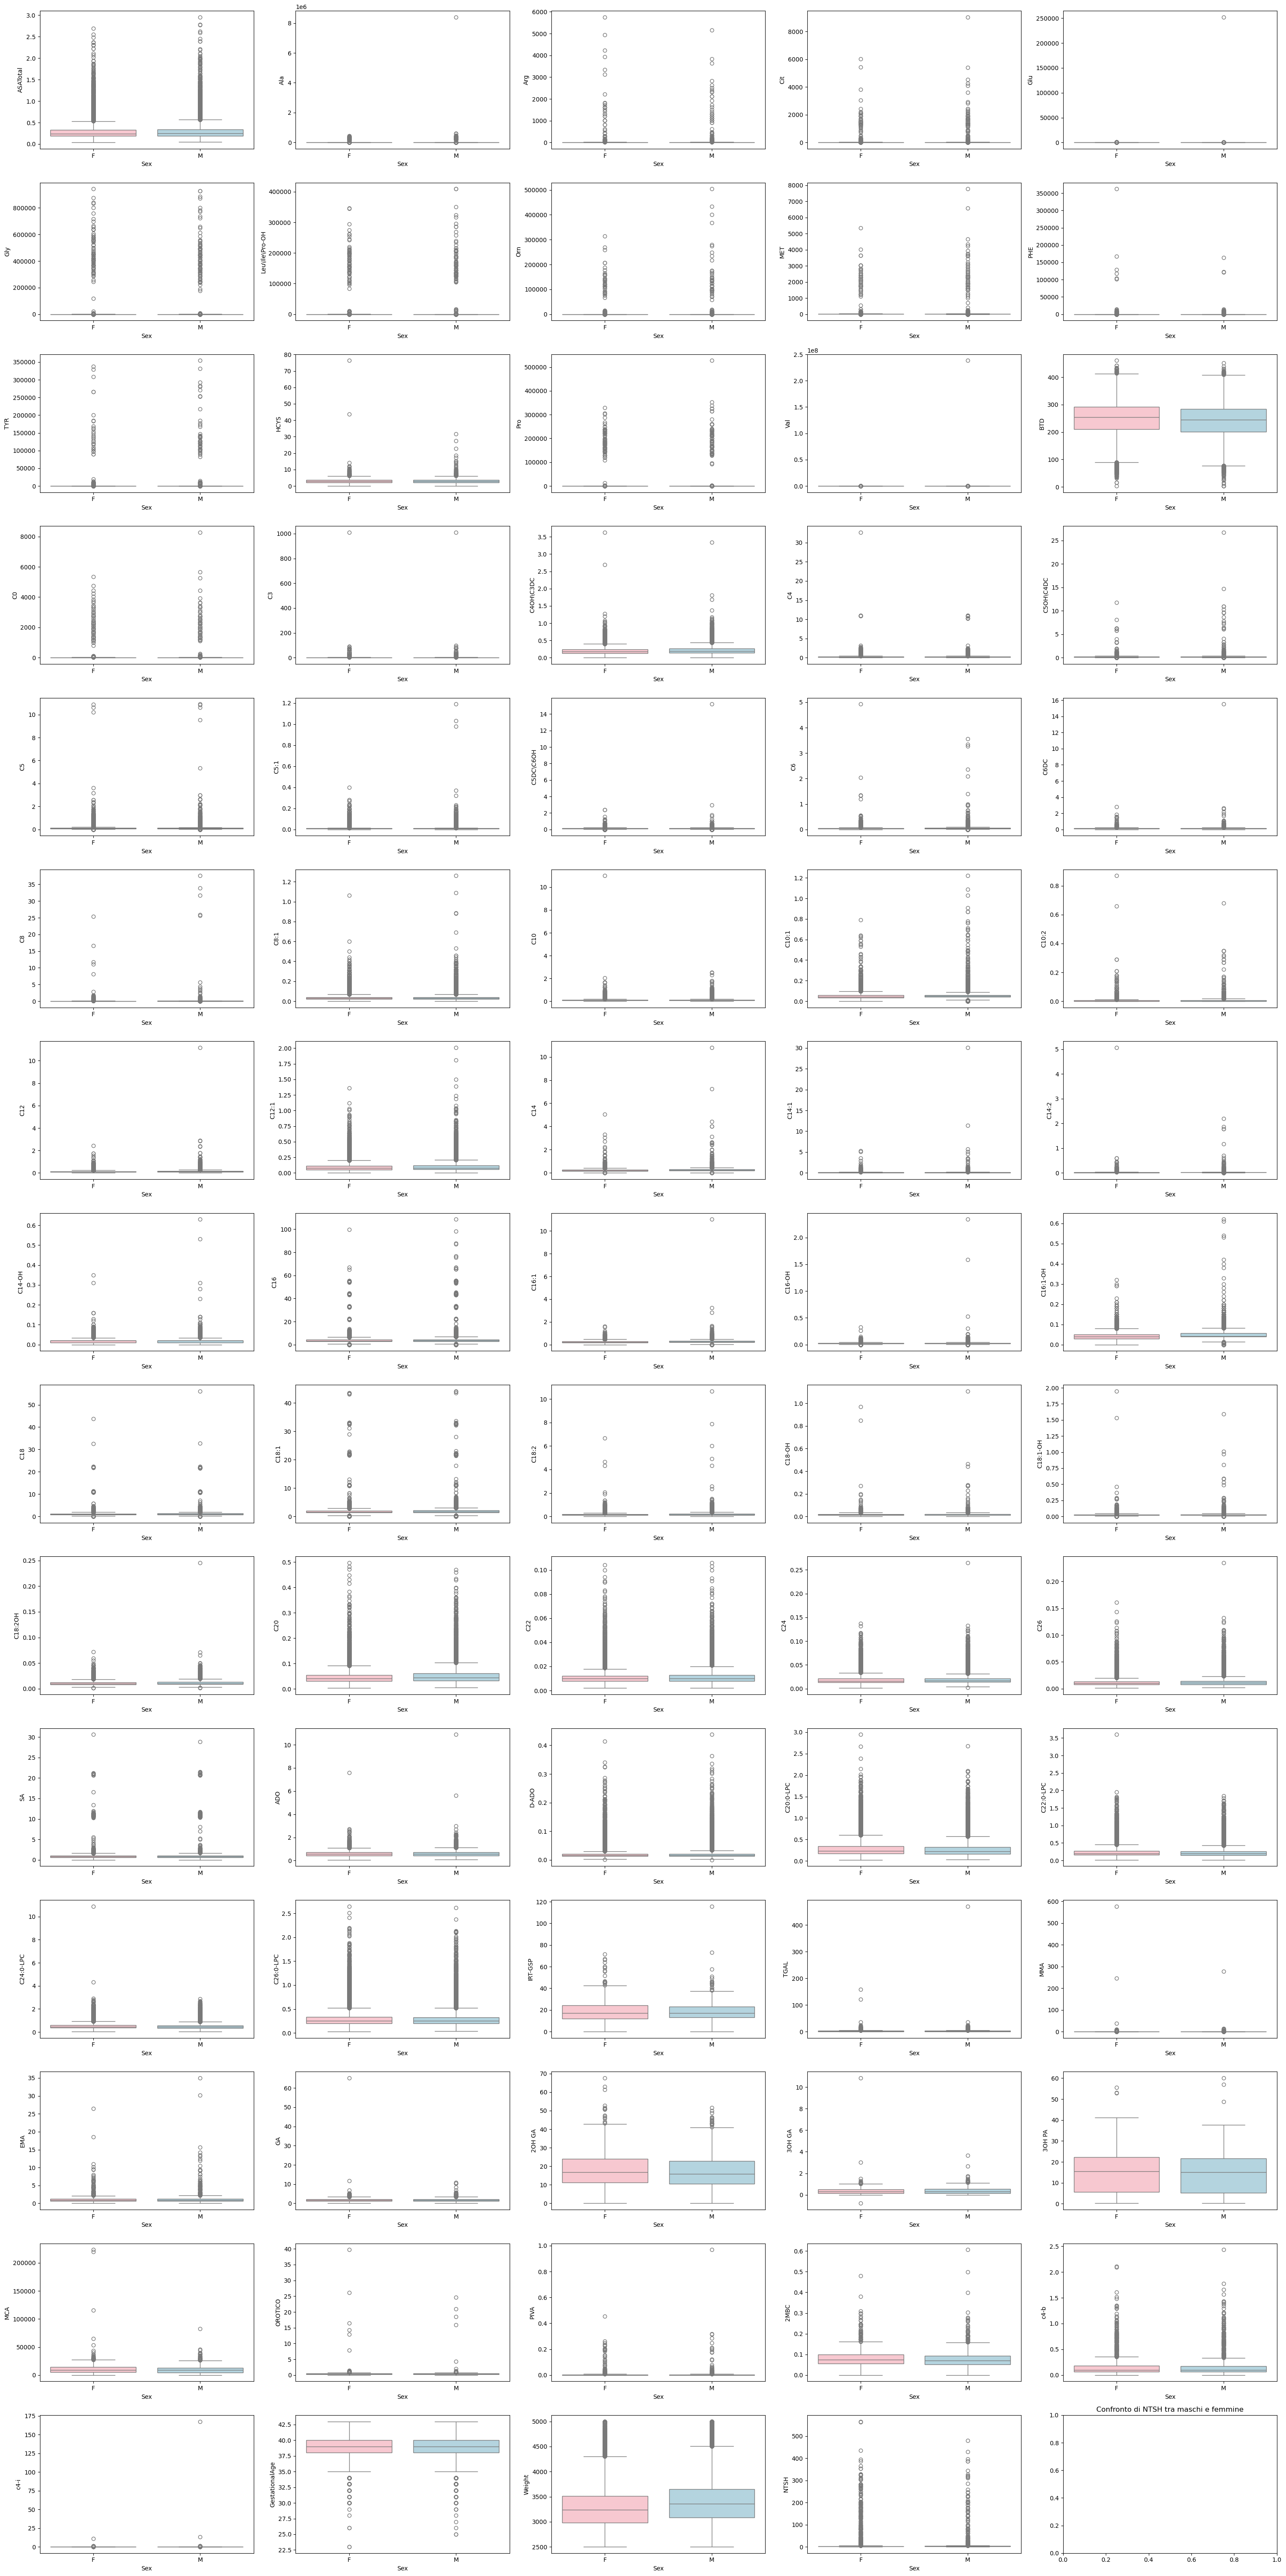

In [151]:
j = 0
i = 0
fig, axes = plt.subplots(15, 5, figsize=(30, 60)) 

ciccionip = ciccioni.to_pandas()

for col in colonne_numeriche: 
    
    sns.boxplot(x='Sex', y= col, ax = axes[i,j], data=ciccionip, hue='Sex', palette={'M': 'lightblue', 'F': 'pink'})  
    plt.title(f'Confronto di {col} tra maschi e femmine')
    #plt.show()
    #plt.xticks(fontsize=20)  
    #plt.yticks(fontsize=40)
    j = j+1
    if j % 5 == 0:
        i = i + 1
        j = 0    

plt.savefig('F_M_grandi.png')
plt.tight_layout()

### Distribution comparison

In [310]:
n1 = extra_piccoli.filter(pl.col('Diagnosis') != 'HEALTHY').shape[0]

In [312]:
n2 = piccoli_pic.filter(pl.col('Diagnosis') != 'HEALTHY').shape[0]

In [314]:
n3 = piccoli.filter(pl.col('Diagnosis') != 'HEALTHY').shape[0]

In [316]:
n4 = ciccioni.filter(pl.col('Diagnosis') != 'HEALTHY').shape[0]

In [318]:
p1 = round((n1/extra_piccoli.shape[0]) * 100, 2)
p2 = round((n2/piccoli_pic.shape[0]) * 100, 2)
p3 = round((n3/piccoli.shape[0]) * 100, 2) 
p4 = round((n4/ciccioni.shape[0]) * 100, 2)

In [320]:
data = {
    'Weight': ['< 1500', '1500 - 2000', ' 2000 - 2500', ' > 2500'],
    'Size': [extra_piccoli.shape[0], piccoli_pic.shape[0], piccoli.shape[0], ciccioni.shape[0]],
    'Positives': [n1, n2, n3, n4],
    'Percentage': [p1, p2, p3, p4]
}

# Creiamo il DataFrame
dati = pd.DataFrame(data)

In [322]:
dati.to_csv('dati.csv', index=False)

In [324]:
dati

Weight    Size  Positives  Percentage
0        < 1500    5966          5        0.08
1   1500 - 2000    9172          0        0.00
2   2000 - 2500   35527         14        0.04
3        > 2500  698051        179        0.03

In [160]:
babies.shape

(791752, 102)

#### **Nice Table**

In [166]:
from tabulate import tabulate

# Creazione di un DataFrame Polars
data = {
    'Weight': ['> 2500','2500-2000', '2000-1500', '1500 >'],
    'Size': [ciccioni.shape[0], piccoli.shape[0], piccoli_pic.shape[0], extra_piccoli.shape[0]]
}

df = pl.DataFrame(data)

# Converti Polars DataFrame in Pandas DataFrame per usare tabulate
df_pandas = df.to_pandas()

# Visualizza la tabella con il formato 'grid'
print(tabulate(df_pandas, headers='keys', tablefmt='grid', showindex=False))


+-----------+--------+
| Weight    |   Size |
+===========+========+
| > 2500    | 698051 |
+-----------+--------+
| 2500-2000 |  35527 |
+-----------+--------+
| 2000-1500 |   9172 |
+-----------+--------+
| 1500 >    |   5966 |
+-----------+--------+
